# <center>Telecom Churn - ML Group Case Study</center>
## <center>Problem Statement :</center>

### <span style='color:#A9A9A9'> Business Problem Overview -</span>

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, _retaining high profitable customers is the number one business goal._

To reduce customer churn, telecom companies need to **predict which customers are at high risk of churn.**

_We will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn._


#### <span style='color:#A9A9A9'>Understanding and Defining Churn - </span>

There are two main models of payment in the telecom industry - **postpaid** (customers pay a monthly/annual bill after using the services) and **prepaid** (customers pay/recharge with a certain amount in advance and then use the services).

In the postpaid model, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and you directly know that this is an instance of churn.

However, in the prepaid model, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the services again).

Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully.  Also, prepaid is the most common model in India and southeast Asia, while postpaid is more common in Europe in North America.

This project is based on the Indian and Southeast Asian market.

### <span style='color:#A9A9A9'> Definitions of Churn - </span>

There are various ways to define churn, such as:

**Revenue-based churn:** Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.

The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas

**Usage-based churn:** Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.

In this project, **we will be using the usage-based definition to define churn.**

#### <span style='color:#A9A9A9'> High-value Churn - </span>
In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

In this project, we will define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.

### <span style='color:#A9A9A9'> Understanding the Business Objective and the Data - </span>
The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 

The **business objective** is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

### <span style='color:#A9A9A9'>  Understanding Customer Behaviour During Churn - </span>

Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are **three phases** of customer lifecycle :

1. The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

2. The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

3. The ‘churn’ phase: In this phase, the customer is said to have churned. We **define churn based on this phase.** Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

In this case, since we are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

### <span style='color:#A9A9A9'> Data Preparation - </span>
The following data preparation steps are crucial for this problem:

1. **Derive new features**

This is one of the most important parts of data preparation since good features are often the differentiators between good and bad models. Use your business understanding to derive features you think could be important indicators of churn.

2. **Filter high-value customers**

As mentioned above, you need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

After filtering the high-value customers, you should get about 29.9k rows.

3. **Tag churners and remove attributes of the churn phase**

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

- total_ic_mou_9

- total_og_mou_9

- vol_2g_mb_9

- vol_3g_mb_9

After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

### <span style='color:#A9A9A9'>Modelling - </span>

Build models to predict churn. The predictive model that you’re going to build will serve two purposes:

1. It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

2. It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks. 

### <span style='color:#A9A9A9'> Solution and Approach -</span>

Below are the steps we has been performed for churn modeling:

- Preprocess data (convert columns to appropriate formats, handle missing values, handling of NA values and outliers etc.) and perfrom  EDA.
- Check Relationships among different features and drop highly coreleated features.
- Derive new features - 
   - New features have been created for good phase by taking the average of 6th and 7th month values.
   - New features have been derived from date related values.
   - New features have been derived in action phase by taking the difference between good phase and 8th month corresponding features.
- Data set is highly imbalanced towards 'Non-churn' majority class, imbalanced data set handling was done, with below techniques
    - SMOTE: synthetic sample generation for minority class.
    - Majority class under sampling.
- We have divided data into into training and test set.
- Basic model was created using Logistic Regression.
- Sensitivity & F1 score has to be maximized for Churn prediction.
- We have performed feature reduction using PCA and features has been reduced to ~ 35.
- Baseline model was created.
- Multiple boosting models were tried namely - Ada Boost and Gradient Boosting.
- An ensemble model using majority vote strategy was also created using Logistic Regression, Decision trees, Random Forest and Linear SVM.
- The best prediction model was obtained using Gradiant Boost with a sensitivity of approx. 86% a precision of 35% & F1 score of 49% was obtained.
- Just to understand factors of churn a logistic regression model was build and features influencing churn were obtained using LASSO and feature elimination using high p-value and VIF for multicollinearity.
- Finally we came up with strategies and recommendation reducing churn rate.

## <center>Solution</center>
### Data Preparation -

In [3]:
#import required modules 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from __future__ import division
import gc
import os
import warnings

#filter warnings
warnings.filterwarnings('ignore')
#setting for inline plotting
%matplotlib inline

SyntaxError: from __future__ imports must occur at the beginning of the file (<ipython-input-3-8271eb43f176>, line 15)

In [2]:
# load the telecom churn data
telecom_data = pd.read_csv('D:\\PG Diploma in Machine Learning and AI May 2019\\Machine Learning - 2\\Telecom Churn Case Study\\data\\telecom_churn_data.csv',sep = ",", encoding = "iso-8859-1")

NameError: name 'pd' is not defined

In [3]:
telecom_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 167.8+ MB


### Analysis on Recharge Amount -
<span style='color:#14445B'>Analysis on recharge related variables. This will help us determine the high value customers.</span>

In [5]:
#Extract list of columns containing recharge amount
recharge_amnt_col =  telecom_data.columns[telecom_data.columns.str.contains('rech_amt|rech_data')]

In [6]:
print(recharge_amnt_col)

Index([u'total_rech_amt_6', u'total_rech_amt_7', u'total_rech_amt_8',
       u'total_rech_amt_9', u'max_rech_amt_6', u'max_rech_amt_7',
       u'max_rech_amt_8', u'max_rech_amt_9', u'date_of_last_rech_data_6',
       u'date_of_last_rech_data_7', u'date_of_last_rech_data_8',
       u'date_of_last_rech_data_9', u'total_rech_data_6', u'total_rech_data_7',
       u'total_rech_data_8', u'total_rech_data_9', u'max_rech_data_6',
       u'max_rech_data_7', u'max_rech_data_8', u'max_rech_data_9',
       u'av_rech_amt_data_6', u'av_rech_amt_data_7', u'av_rech_amt_data_8',
       u'av_rech_amt_data_9'],
      dtype='object')


We could see we have 4 set of values for 6, 7, 8 and 9 i.e.,  June, July, August and September for -
- maximum recharge amount and 
- total recharge for data
- maximum recharge for data
- total recharge amount
- average recharge amount for data

In [7]:
# missing values check for recharge amount
100*telecom_data.loc[:,recharge_amnt_col].isnull().sum()/len(telecom_data)

total_rech_amt_6             0.000000
total_rech_amt_7             0.000000
total_rech_amt_8             0.000000
total_rech_amt_9             0.000000
max_rech_amt_6               0.000000
max_rech_amt_7               0.000000
max_rech_amt_8               0.000000
max_rech_amt_9               0.000000
date_of_last_rech_data_6    74.846748
date_of_last_rech_data_7    74.428744
date_of_last_rech_data_8    73.660737
date_of_last_rech_data_9    74.077741
total_rech_data_6           74.846748
total_rech_data_7           74.428744
total_rech_data_8           73.660737
total_rech_data_9           74.077741
max_rech_data_6             74.846748
max_rech_data_7             74.428744
max_rech_data_8             73.660737
max_rech_data_9             74.077741
av_rech_amt_data_6          74.846748
av_rech_amt_data_7          74.428744
av_rech_amt_data_8          73.660737
av_rech_amt_data_9          74.077741
dtype: float64

<span style='color:#14445B'>_Around 75% values for max recharge data, average recharge amount & total recharge date & date of data recharge for mobile internet data is missing._</span>

In [8]:
recharge_amnt_col_6 = telecom_data.columns[telecom_data.columns.str.contains('rech_amt_6|rech_data_6|rech_amt_data_6')]

telecom_data.loc[:,recharge_amnt_col_6].describe()

,total_rech_amt_6,max_rech_amt_6,total_rech_data_6,max_rech_data_6,av_rech_amt_data_6
count,99999.000000,99999.000000,25153.000000,25153.000000,25153.000000
mean,327.514615,104.637486,2.463802,126.393392,192.600982
std,398.019701,120.614894,2.789128,108.477235,192.646318
min,0.000000,0.000000,1.000000,1.000000,1.000000
25%,109.000000,30.000000,1.000000,25.000000,82.000000
50%,230.000000,110.000000,1.000000,145.000000,154.000000
75%,437.500000,120.000000,3.000000,177.000000,252.000000
max,35190.000000,4010.000000,61.000000,1555.000000,7546.000000


<span style='color:#14445B'>total_rech_data has discrete values & the non NA values for total_rech_data & av_rech_amt_data is the same. Hence, we can find out total recharge amount for data from these two. </span>

In [9]:
#check if any values where total_rech_data is NA and value is present for av_rech_amt_data & vice versa
#Also check how many av_rech_amt_data_6 is NA
is_invlid_data_6 = telecom_data['av_rech_amt_data_6'] == np.nan
is_invlid_data_7 = telecom_data['av_rech_amt_data_7'] == np.nan
is_invlid_data_8 = telecom_data['av_rech_amt_data_7'] == np.nan

# check if any value is present for these rows for total_rech_data
print(telecom_data.loc[is_invlid_data_6,'total_rech_data_6'].sum())
print(telecom_data.loc[is_invlid_data_7,'total_rech_data_7'].sum())
print(telecom_data.loc[is_invlid_data_8,'total_rech_data_8'].sum())

# check how many total_rech_data_6 is NA
is_invlid_data_6 = telecom_data['total_rech_data_6'] == np.nan 
is_invlid_data_7 = telecom_data['total_rech_data_7'] == np.nan 
is_invlid_data_8 = telecom_data['total_rech_data_8'] == np.nan 

# check if any value is present for these rows for av_rech_amt_data_6
print(telecom_data.loc[is_invlid_data_6,'av_rech_amt_data_6'].sum())
print(telecom_data.loc[is_invlid_data_7,'av_rech_amt_data_7'].sum())
print(telecom_data.loc[is_invlid_data_8,'av_rech_amt_data_8'].sum())

0.0
0.0
0.0
0.0
0.0
0.0


In [10]:
#We could see in previous step values are consistent with each other, also as minimum value is 1 we can impute the NA values by 0 meaning 
#there was no recharge done by the customer.
telecom_data.loc[:,['total_rech_data_6','total_rech_data_7','total_rech_data_8']]= \
telecom_data.loc[:,['total_rech_data_6','total_rech_data_7','total_rech_data_8']].replace(np.NaN,0)
telecom_data.loc[:,['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8']]= \
telecom_data.loc[:,['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8']].replace(np.NaN,0)

In [11]:
#Add a new derived variable total recharge amount for data: total_rech_amt_data
telecom_data['total_rech_amt_data_6'] = telecom_data.av_rech_amt_data_6*telecom_data.total_rech_data_6
telecom_data['total_rech_amt_data_7'] = telecom_data.av_rech_amt_data_7*telecom_data.total_rech_data_7
telecom_data['total_rech_amt_data_8'] = telecom_data.av_rech_amt_data_8*telecom_data.total_rech_data_8

<span style='color:#14445B'> Lets define total average recharge amount for good phase since average of total recharge amount & total recharge amount for data for months 6 and 7 (good phase months). </span>

In [12]:
telecom_data['total_avg_rech_amnt_good_ph'] = (telecom_data.total_rech_amt_6 +telecom_data.total_rech_amt_data_6 \
                                               + telecom_data.total_rech_amt_7+telecom_data.total_rech_amt_data_7)/4

<span style='color:#14445B'>We are defining High Value Customer who have total average recharge amount for good phase greater than 70th percentile value here. </span>

In [13]:
#Lets create a filter for values greater than 70th percentile of total average recharge amount for good phase 
high_value_filter = telecom_data.total_avg_rech_amnt_good_ph >= telecom_data.total_avg_rech_amnt_good_ph.quantile(0.7)

In [14]:
#subset out the High Value customers
telecom_data = telecom_data.loc[high_value_filter,:]

#check count of remain records
len(telecom_data.loc[high_value_filter,:])

30001

<span style='color:#14445B'> After filtering the high-value customers, we are left with **30001** rows. </span>

### Create Labels for Churned Customers -

In [15]:
#label the churned customers
#defining new column as "churn" with value as '1' if the customer has churned else '0'.
#Initially set all the values as 0
telecom_data['churn']= 0

In [16]:
#total_ic_mou_9, total_ic_mou_9, vol_2g_mb_9 and vol_3g_mb_9 columns will be used to find the churned customers in the 9th month 
#Check if any NA/Null values are present
ls_9 = ['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9','vol_3g_mb_9']
100*telecom_data.loc[:,ls_9].isnull().sum()/len(telecom_data)

total_ic_mou_9    0.0
total_og_mou_9    0.0
vol_2g_mb_9       0.0
vol_3g_mb_9       0.0
dtype: float64

In [17]:
#define is_churned boolean flag for customers where above values are zero
is_churned = (telecom_data.total_ic_mou_9 == 0) & (telecom_data.total_og_mou_9 == 0) & (telecom_data.vol_2g_mb_9 ==0)& \
(telecom_data.vol_3g_mb_9 ==0)

print(is_churned.head())

0      True
7      True
8     False
21    False
23    False
dtype: bool


In [18]:
#let's set all such rows fulfilling is_churned condition as 1
telecom_data.loc[is_churned,'churn']=1

#Now check what's the % of churned customers
100*telecom_data.churn.sum()/len(is_churned)

8.136395453484884

<span style='color:#14445B'>So approx. 8% of high value customers have churned. <span style='color:#14445B'>

In [19]:
#extract all the columns listed in the 9th Month i.e., churned month
month_9_col =  telecom_data.columns[telecom_data.columns.str.contains('_9')]

# drop all columns corresponding to the attributes of churn phase
telecom_data.drop(month_9_col,axis=1,inplace=True)

In [20]:
# let's check how many columns remain
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Columns: 177 entries, mobile_number to churn
dtypes: float64(140), int64(28), object(9)
memory usage: 39.7+ MB


In [21]:
100*telecom_data.isnull().sum()/len(telecom_data.index)

mobile_number                   0.000000
circle_id                       0.000000
loc_og_t2o_mou                  0.746642
std_og_t2o_mou                  0.746642
loc_ic_t2o_mou                  0.746642
last_date_of_month_6            0.000000
last_date_of_month_7            0.089997
last_date_of_month_8            0.549982
arpu_6                          0.000000
arpu_7                          0.000000
arpu_8                          0.000000
onnet_mou_6                     1.816606
onnet_mou_7                     1.789940
onnet_mou_8                     3.913203
offnet_mou_6                    1.816606
offnet_mou_7                    1.789940
offnet_mou_8                    3.913203
roam_ic_mou_6                   1.816606
roam_ic_mou_7                   1.789940
roam_ic_mou_8                   3.913203
roam_og_mou_6                   1.816606
roam_og_mou_7                   1.789940
roam_og_mou_8                   3.913203
loc_og_t2t_mou_6                1.816606
loc_og_t2t_mou_7

<span style='color:#14445B'>Now we will be creating a function to analyze_feature across months.</span>
- <span style='color:#14445B'>create box plots to compare variable distribution across months 6,7 and 8 for customers who have churned and otherwise.</span>

- <span style='color:#14445B'>create summary of the mean and standard deviation of variable distribution across months 6,7 and 8 for churn and non-churn customers.</span>

<span style='color:#14445B'>This is to analyze_feature across months 6,7 (good phase) and 8.</span></span>

In [22]:
#User defined function to anlyze the features across 6th, 7th & 8th months
#[17, 7]
def analyze_feature(feature_start):
    plt.rcParams["figure.figsize"] = [20, 10]
    fig = plt.figure()
    print("Churn Stats (mean and standard deviation):")
    cols = {c: feature_start + "_" + str(c) for c in [6,7,8]}
    print(cols)
    frame_data = []
    [frame_data.append({
        "mean_6": telecom_data[telecom_data["churn"] == churn][cols[6]].mean(),
        "mean_7": telecom_data[telecom_data["churn"] == churn][cols[7]].mean(),
        "mean_8": telecom_data[telecom_data["churn"] == churn][cols[8]].mean(),
        "std_6": telecom_data[telecom_data["churn"] == churn][cols[6]].std(),
        "std_7": telecom_data[telecom_data["churn"] == churn][cols[7]].std(),
        "std_8": telecom_data[telecom_data["churn"] == churn][cols[8]].std()
    }) for churn in [0,1]]
    
    f,axes = plt.subplots(nrows=1, ncols=3)
    sns.boxplot(data=telecom_data, y=feature_start + "_6", x="churn",
                hue="churn", linewidth=2.5, showfliers=False, ax=axes[0],color="skyblue")
    sns.boxplot(data=telecom_data, y=feature_start + "_7",  x="churn",
                hue="churn", linewidth=2.5, showfliers=False, ax=axes[1],color="skyblue")
    sns.boxplot(data=telecom_data, y=feature_start + "_8",  x="churn",
                hue="churn", linewidth=2.5, showfliers=False, ax=axes[2],color="skyblue")
    return pd.DataFrame(frame_data,index={"Non Churned","Churned"}).round(3)

### Variables related Recharge Amount  

In [23]:
#Re-extract the recharge amount related columns
recharge_amnt_col =  telecom_data.columns[telecom_data.columns.str.contains('rech_amt')]

print(recharge_amnt_col)

Index([     u'total_rech_amt_6',      u'total_rech_amt_7',
            u'total_rech_amt_8',        u'max_rech_amt_6',
              u'max_rech_amt_7',        u'max_rech_amt_8',
          u'av_rech_amt_data_6',    u'av_rech_amt_data_7',
          u'av_rech_amt_data_8', u'total_rech_amt_data_6',
       u'total_rech_amt_data_7', u'total_rech_amt_data_8'],
      dtype='object')


Churn Stats (mean and standard deviation):
{8: 'total_rech_amt_8', 6: 'total_rech_amt_6', 7: 'total_rech_amt_7'}


,mean_6,mean_7,mean_8,std_6,std_7,std_8
Non Churned,649.575,663.528,613.701,547.703,574.160,614.833
Churned,786.707,626.290,253.153,681.562,667.938,452.360


<Figure size 1440x720 with 0 Axes>

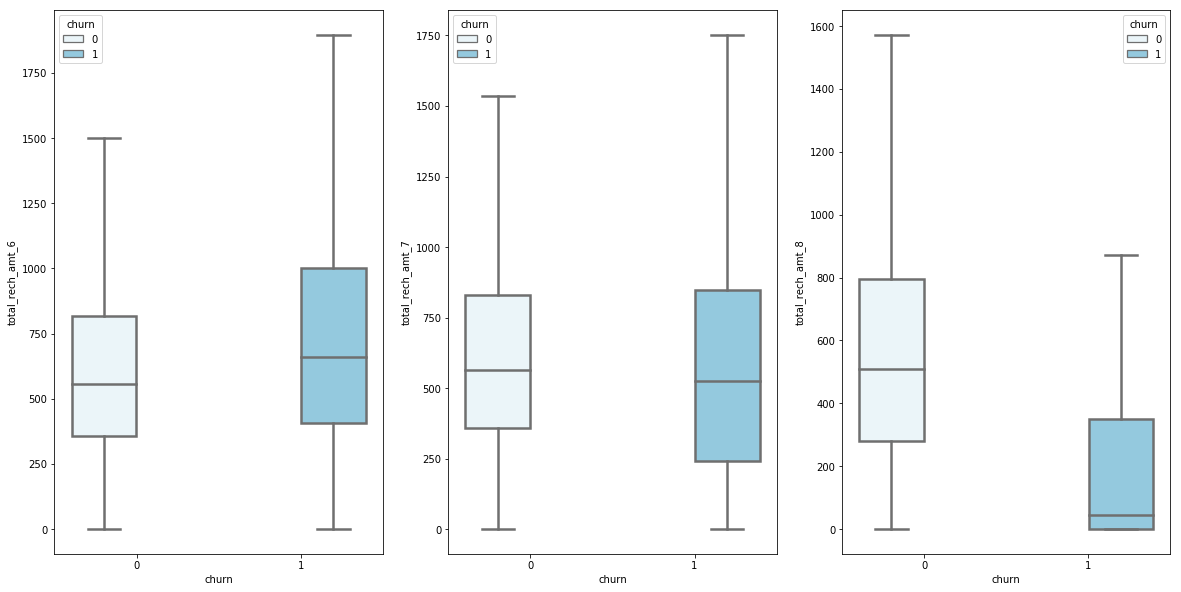

In [24]:
#Time to analyze total recharge amount:
analyze_feature('total_rech_amt')

<span style='color:#14445B'> Here we see drop in the total recharge amount for churned customers.</span>

Churn Stats (mean and standard deviation):
{8: 'total_rech_amt_data_8', 6: 'total_rech_amt_data_6', 7: 'total_rech_amt_data_7'}


,mean_6,mean_7,mean_8,std_6,std_7,std_8
Non Churned,460.077,545.057,496.886,1446.356,1498.871,1683.029
Churned,407.229,338.294,83.523,1055.937,1171.760,476.784


<Figure size 1440x720 with 0 Axes>

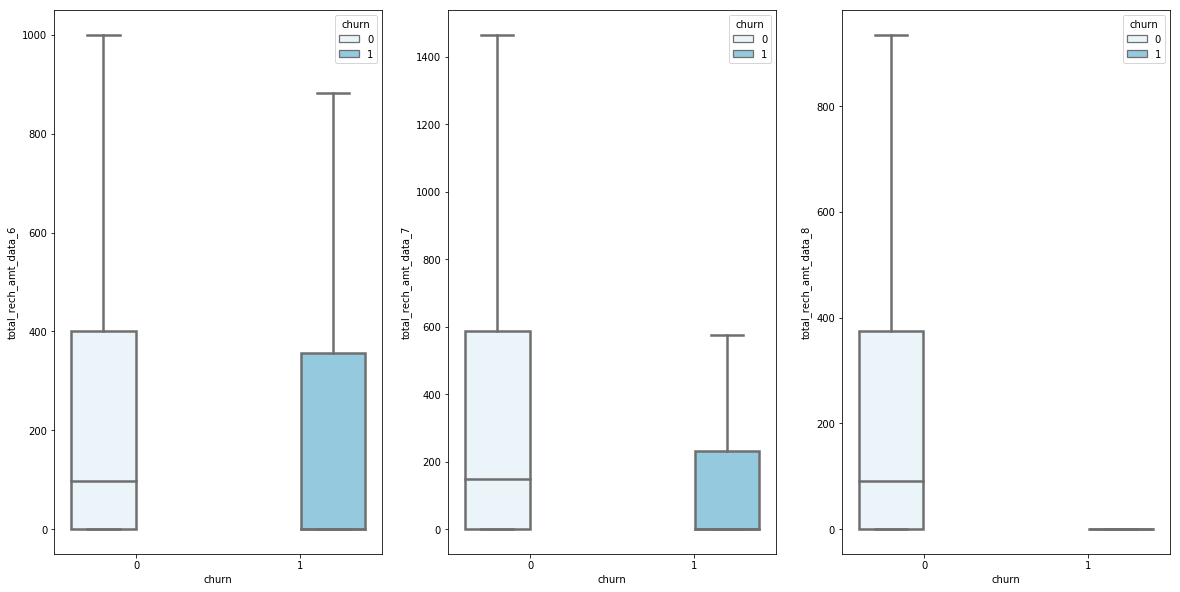

In [25]:
#Now analyze total recharge amount for data:
analyze_feature('total_rech_amt_data')

<span style='color:#14445B'> We see that there is a significant drop in total recharge amount for data in 8th month (action phase) for churned customers. </span>

Churn Stats (mean and standard deviation):
{8: 'max_rech_amt_8', 6: 'max_rech_amt_6', 7: 'max_rech_amt_7'}


,mean_6,mean_7,mean_8,std_6,std_7,std_8
Non Churned,169.049,173.337,166.767,172.005,176.749,171.337
Churned,171.942,159.389,85.371,209.116,226.966,176.648


<Figure size 1440x720 with 0 Axes>

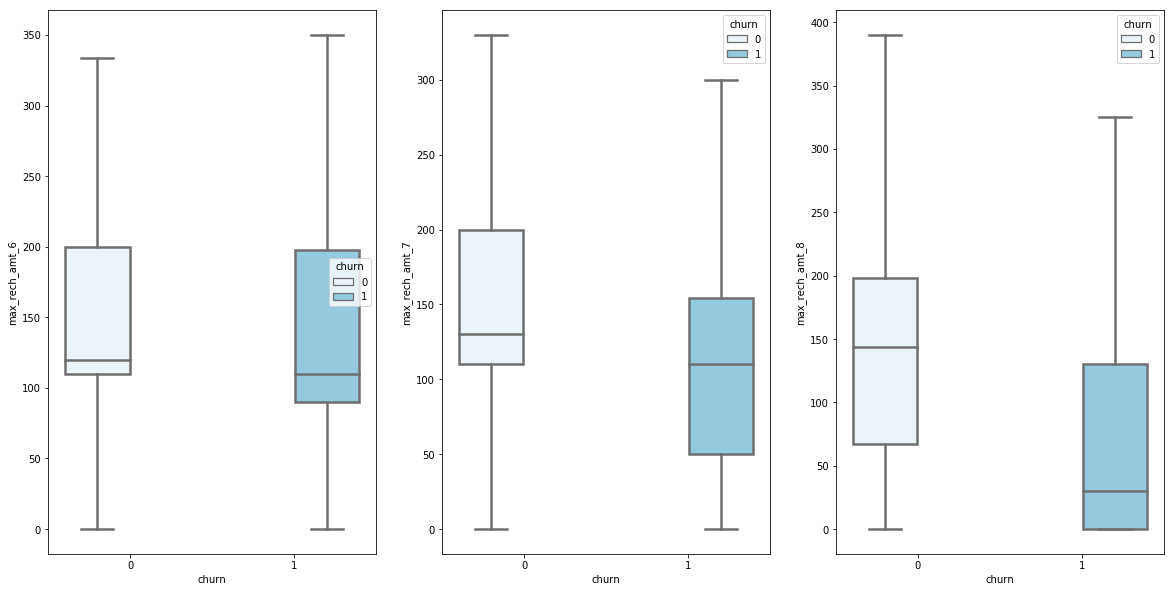

In [26]:
#Analyze maximum recharge amount for data:
analyze_feature('max_rech_amt')

<span style='color:#14445B'> We can  see  drop in maximum recharge amount as well. </span>
<span style='color:#14445B'> As we have already derived total recharge amount for data using average recharge amount for data and total recharge for data let's drop these columns. </span>

In [27]:
# drop av_rech_amt_data and total_rech_data columns as total_rech_amt_data derived using these columns.
telecom_data.drop(['av_rech_amt_data_6','av_rech_amt_data_7'
                   ,'av_rech_amt_data_8','total_rech_data_6','total_rech_data_7','total_rech_data_8'],axis=1,inplace=True)

In [28]:
# Time for some feature engineering. We will derive 3 new columns now.
#1. Total recharge amount for good phase: total_rech_amt_good_ph
#2. Total recharge amount data for good phase: total_rech_amt_data_good_ph
#3. Max recharge amount for good phase: max_rech_amt_good_ph

telecom_data['total_rech_amt_good_ph'] = (telecom_data.total_rech_amt_6 + telecom_data.total_rech_amt_7)/2
telecom_data['total_rech_amt_data_good_ph'] = (telecom_data.total_rech_amt_data_6 + telecom_data.total_rech_amt_data_7)/2
telecom_data['max_rech_amt_good_ph'] = (telecom_data.max_rech_amt_6 + telecom_data.max_rech_amt_7)/2

# drop the original columns as these are not required any more
telecom_data.drop(['total_rech_amt_6','total_rech_amt_7'
              ,'max_rech_amt_6','max_rech_amt_7','total_rech_amt_data_6','total_rech_amt_data_7'],axis=1,inplace=True)

# drop total_avg_rech_amnt_good_ph as we are using the component columns defined above
telecom_data.drop('total_avg_rech_amnt_good_ph',axis=1,inplace=True)

### Last day Recharge Amount -

In [29]:
#Extract last day recharge amount columns
last_day_rech_amt = telecom_data.columns[telecom_data.columns.str.contains('day')]

Churn Stats (mean and standard deviation):
{8: 'last_day_rch_amt_8', 6: 'last_day_rch_amt_6', 7: 'last_day_rch_amt_7'}


,mean_6,mean_7,mean_8,std_6,std_7,std_8
Non Churned,100.587,102.276,97.417,140.808,139.566,145.528
Churned,104.356,78.684,35.680,173.407,153.831,128.249


<Figure size 1440x720 with 0 Axes>

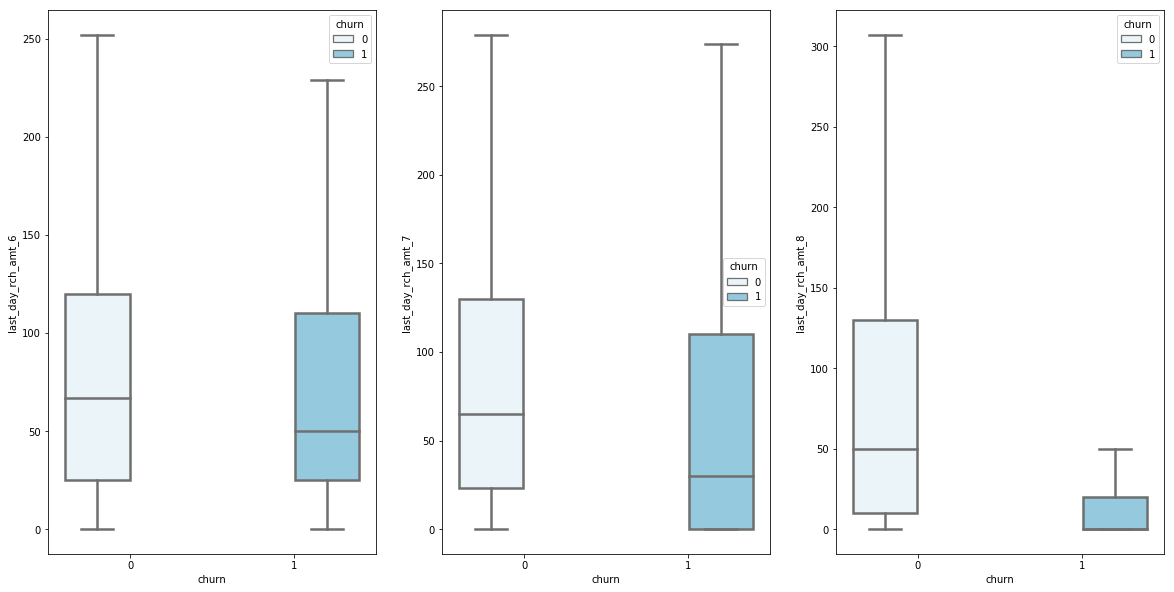

In [30]:
#Check mean variation in last day recharge for churned & non churned customers
analyze_feature('last_day_rch_amt')

 <span style='color:#14445B'> We could  see that there is a significant drop in last month recharge amount for churned customers. </span>

In [31]:
#Now Let's define one more new derived column - last day recharge amount for good phase: last_day_rch_amt_good_ph
telecom_data['last_day_rch_amt_good_ph'] = (telecom_data.last_day_rch_amt_6 + telecom_data.last_day_rch_amt_7)/2

# drop the original columns as these are not longer required
telecom_data.drop(['last_day_rch_amt_6','last_day_rch_amt_7'],axis=1,inplace=True)

### Few other Recharge related Variables -

In [32]:
#Check other recharge related variables:
ls_recharge = telecom_data.columns[telecom_data.columns.str.contains('rech_num|max_rech_data',regex=True)]

In [33]:
#Now lets check the % of NA values for recharge related variables
100*telecom_data.loc[:,ls_recharge].isnull().sum()/len(telecom_data)

total_rech_num_6     0.000000
total_rech_num_7     0.000000
total_rech_num_8     0.000000
max_rech_data_6     44.148528
max_rech_data_7     43.145228
max_rech_data_8     46.825106
dtype: float64

In [34]:
#Check the distribution for max_rech_data
telecom_data.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']].describe()

,max_rech_data_6,max_rech_data_7,max_rech_data_8
count,16756.000000,17057.000000,15953.000000
mean,139.798580,140.431143,136.329217
std,118.851784,120.247247,119.531924
min,1.000000,1.000000,1.000000
25%,25.000000,25.000000,25.000000
50%,152.000000,152.000000,152.000000
75%,198.000000,198.000000,198.000000
max,1555.000000,1555.000000,1555.000000


<span style='color:#14445B'> We see that the minimum value is 1 while the max is 1555 across months, which implies the missing values are cases where there was no recharge for data, let's impute the missing values by 0 indicating no recharge. </span>

In [35]:
telecom_data.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']] \
= telecom_data.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']].replace(np.nan,0)

# Let us define new derived column
# maximum recharge for data for good phase: max_rech_data_good_ph
telecom_data['max_rech_data_good_ph'] = (telecom_data.max_rech_data_6 + telecom_data.max_rech_data_7)/2

# drop the original columns as these are not longer required
telecom_data.drop(['max_rech_data_6','max_rech_data_7'],axis=1,inplace=True)

In [36]:
#Check total recharge number
ls_tot_recharge_num = telecom_data.columns[telecom_data.columns.str.contains('total_rech_num')]

#Now check summary stats:
print(telecom_data.loc[:,ls_tot_recharge_num].describe())

#Check the median variation in total recharge numbers for churned and non churned customers
pd.DataFrame([telecom_data.loc[telecom_data.churn==0,ls_tot_recharge_num].median()
              ,telecom_data.loc[telecom_data.churn==1,ls_tot_recharge_num].median()],index={'Non Churned','Churned'})

       total_rech_num_6  total_rech_num_7  total_rech_num_8
count      30001.000000      30001.000000      30001.000000
mean          11.851005         11.718843          9.972868
std            9.429132          9.432418          9.274370
min            0.000000          0.000000          0.000000
25%            6.000000          6.000000          4.000000
50%            9.000000          9.000000          8.000000
75%           15.000000         15.000000         13.000000
max          307.000000        138.000000        196.000000


,total_rech_num_6,total_rech_num_7,total_rech_num_8
Non Churned,9.0,9.0,8.0
Churned,11.0,9.0,3.0


<span style='color:#14445B'> We could see there are some outliers in 6th month overall distribution is similar for 6,7 and 8th month, We do see a drop in median recharge numbers </span>

In [37]:
# Let us define new derived column
# total recharge number for good phase: total_rech_num_good_ph
telecom_data['total_rech_num_good_ph'] = (telecom_data.total_rech_num_6 + telecom_data.total_rech_num_7)/2

# drop the original columns as these are not longer required
telecom_data.drop(['total_rech_num_6','total_rech_num_7'],axis=1,inplace=True)

### Variables related to 2G & 3G usage  -

In [38]:
#extract the 2G and 3G usage related columns
typ_2g_or_3g = telecom_data.columns[telecom_data.columns.str.contains('2g|3g',regex=True)]
#print(telecom_data.loc[:,typ_2g_or_3g].info())
#And check the % of NA values present
telecom_data.loc[:,typ_2g_or_3g].isnull().sum()/len(telecom_data.loc[:,typ_2g_or_3g])

count_rech_2g_6    0.441485
count_rech_2g_7    0.431452
count_rech_2g_8    0.468251
count_rech_3g_6    0.441485
count_rech_3g_7    0.431452
count_rech_3g_8    0.468251
vol_2g_mb_6        0.000000
vol_2g_mb_7        0.000000
vol_2g_mb_8        0.000000
vol_3g_mb_6        0.000000
vol_3g_mb_7        0.000000
vol_3g_mb_8        0.000000
arpu_3g_6          0.441485
arpu_3g_7          0.431452
arpu_3g_8          0.468251
arpu_2g_6          0.441485
arpu_2g_7          0.431452
arpu_2g_8          0.468251
monthly_2g_6       0.000000
monthly_2g_7       0.000000
monthly_2g_8       0.000000
sachet_2g_6        0.000000
sachet_2g_7        0.000000
sachet_2g_8        0.000000
monthly_3g_6       0.000000
monthly_3g_7       0.000000
monthly_3g_8       0.000000
sachet_3g_6        0.000000
sachet_3g_7        0.000000
sachet_3g_8        0.000000
aug_vbc_3g         0.000000
jul_vbc_3g         0.000000
jun_vbc_3g         0.000000
sep_vbc_3g         0.000000
dtype: float64

<span style='color:#14445B'> Most of the values are not available for count of recharge & average revenue for 2G/3G per user. We aleady have 2G/3G volume usage based data available. So let's drop these columns. </span>

In [39]:
telecom_data.drop(['count_rech_2g_6','count_rech_2g_7',
              'count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8'
               ,'arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8'],axis=1,inplace=True)

In [ ]:
check the number of features left after dropping the abv cols

In [40]:
#Extract volume of 2G and 3G usage columns
volume_of_usage_3g_and_2g = telecom_data.columns[telecom_data.columns.str.contains('vol_2g|vol_3g',regex=True)]

#Check the summary stats:
print(telecom_data.loc[:,volume_of_usage_3g_and_2g].describe())

        vol_2g_mb_6   vol_2g_mb_7   vol_2g_mb_8   vol_3g_mb_6   vol_3g_mb_7  \
count  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000   
mean     126.522185    125.097326    105.913072    344.258568    370.196701   
std      330.530793    331.548010    313.384838    913.747778    915.525911   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.050000      0.000000      0.000000      0.000000   
75%       83.450000     77.770000     51.650000    358.740000    410.700000   
max    10285.900000   7873.550000  11117.610000  45735.400000  28144.120000   

        vol_3g_mb_8  
count  30001.000000  
mean     351.493998  
std      919.021056  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%      356.190000  
max    30036.060000  


In [41]:
#Check the mean variation in volume of 2G/3G usage for churned & non churned customers
pd.DataFrame([telecom_data.loc[telecom_data.churn==0,volume_of_usage_3g_and_2g].mean()
              ,telecom_data.loc[telecom_data.churn==1,volume_of_usage_3g_and_2g].mean()],index={'Non Churned','Churned'})

,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8
Non Churned,127.830679,128.229264,113.243187,349.825292,383.548331,374.884935
Churned,111.748697,89.736321,23.152745,281.407722,219.450729,87.399685


<span style='color:#14445B'> Below are the two observations from above -</span>

 -  <span style='color:#14445B'>2G/3G usage for churned customers drops in 8th month </span>
 -  <span style='color:#14445B'>We noticed verage 3G usage is higher for non-churned customers indicating that churned customers might be from areas where 3G service is not properly available. </span>

In [42]:
#Define two new derived columns
# 2G volume usage for good phase: vol_2g_mb_good_ph
# 3G volume usage for good phase: vol_3g_mb_good_ph
telecom_data['vol_2g_mb_good_ph'] = (telecom_data.vol_2g_mb_6 + telecom_data.vol_2g_mb_7)/2
telecom_data['vol_3g_mb_good_ph'] = (telecom_data.vol_3g_mb_6 + telecom_data.vol_3g_mb_7)/2

#Now lets drop the original columns as we don't need them any more
telecom_data.drop(['vol_2g_mb_6','vol_2g_mb_7'
              ,'vol_3g_mb_6','vol_3g_mb_7'],axis=1,inplace=True)

In [43]:
#Check monthly 2G/3G service schemes
monthly_2g_3g = telecom_data.columns[telecom_data.columns.str.contains('monthly_2g|monthly_3g',regex=True)]

#Check the summary stats:
print(telecom_data.loc[:,monthly_2g_3g].describe())

       monthly_2g_6  monthly_2g_7  monthly_2g_8  monthly_3g_6  monthly_3g_7  \
count  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000   
mean       0.174494      0.183261      0.153628      0.217759      0.229026   
std        0.434953      0.450423      0.406486      0.613199      0.659125   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        4.000000      5.000000      5.000000     14.000000     16.000000   

       monthly_3g_8  
count  30001.000000  
mean       0.211026  
std        0.617549  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max       16.000000  


In [44]:
#Check the mean variation in monthly schemes of 2G/3G usage for churned & non churned customers
pd.DataFrame([telecom_data.loc[telecom_data.churn==0,monthly_2g_3g].mean()
              ,telecom_data.loc[telecom_data.churn==1,monthly_2g_3g].mean()],index={'Non Churned','Churned'})

,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8
Non Churned,0.181676,0.193215,0.165203,0.219557,0.236575,0.224673
Churned,0.093404,0.070873,0.022941,0.197460,0.143794,0.056944


<span style='color:#14445B'> Again we could see drop in monthly subscription for churned customers in action month i.e., 8th month as compared ot non churned customers.</span>

In [45]:
#Again time to define two new derived columns
# 2G monthly for good phase: monthly_2g_good_ph
# 3G monthly for good phase: monthly_3g_good_ph
telecom_data['monthly_2g_good_ph'] = (telecom_data.monthly_2g_6 + telecom_data.monthly_2g_7)/2
telecom_data['monthly_3g_good_ph'] = (telecom_data.monthly_3g_6 + telecom_data.monthly_3g_7)/2

# drop the original columns. We don't need them now.
telecom_data.drop(['monthly_2g_6','monthly_2g_7'
              ,'monthly_3g_6','monthly_3g_7'],axis=1,inplace=True)

### Volume Based Cost -

Churn Stats (mean and standard deviation):
{8: 'vbc_3g_8', 6: 'vbc_3g_6', 7: 'vbc_3g_7'}


,mean_6,mean_7,mean_8,std_6,std_7,std_8
Non Churned,162.370,186.206,180.501,421.204,452.599,432.852
Churned,115.097,96.076,40.852,359.705,312.566,211.713


<Figure size 1440x720 with 0 Axes>

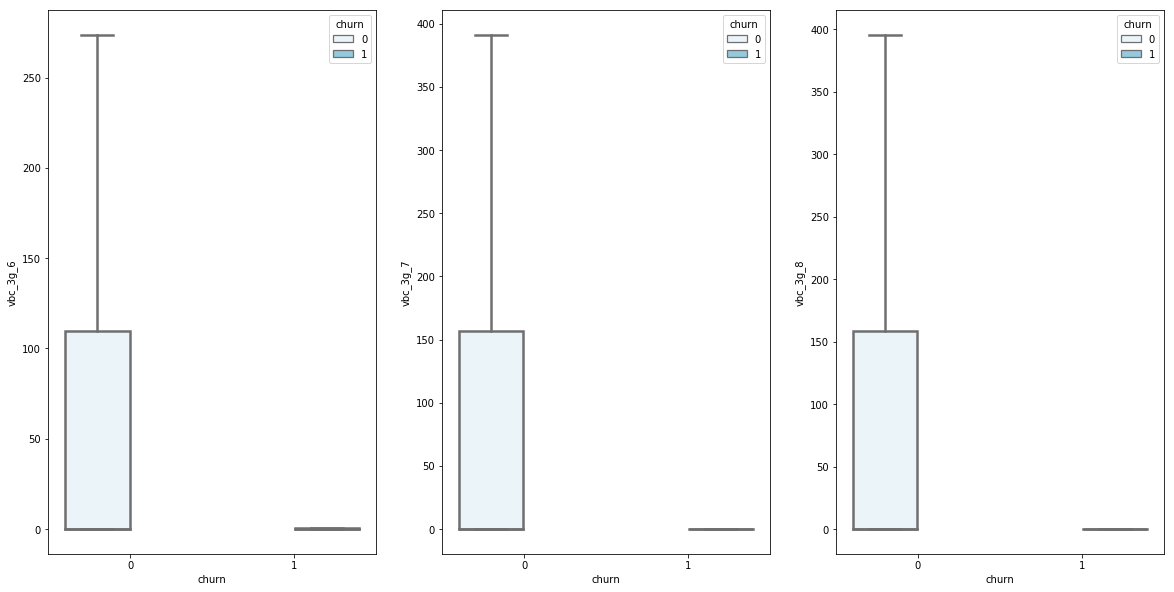

In [46]:
#rename month named vbc columns to 6,7,8,9 format
telecom_data.rename(columns={'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7','aug_vbc_3g':'vbc_3g_8'
                         ,'sep_vbc_3g':'vbc_3g_9'}, inplace=True)

#drop 9th month column.We don't need it any more.
telecom_data.drop('vbc_3g_9',axis=1,inplace=True)

#Check the volumne based cost for 3G
volumn_based_cost_3g = telecom_data.columns[telecom_data.columns.str.contains('vbc_3g')]

# analyze volume based cost
analyze_feature('vbc_3g')

<span style='color:#14445B'> Volume based cost for 3G is much lower for Churned customers as compared to Non-Churned Customers & also there is a drop in vbc in 8th month.</span>

In [47]:
#Again kets define new derived columns
#3g volume based cost for good phase: vbc_3g_good_ph
telecom_data['vbc_3g_good_ph'] = (telecom_data['vbc_3g_6'] + telecom_data['vbc_3g_7'])/2

# drop the original columns as these are not longer required
telecom_data.drop(['vbc_3g_6','vbc_3g_7'],axis=1,inplace=True)

### Sachet Subscription -

In [48]:
#Check sachet subscription for 2G/3G
sachet_2g_or_3g = telecom_data.columns[telecom_data.columns.str.contains('sachet_2g|sachet_3g',regex=True)]

print(telecom_data.loc[:,sachet_2g_or_3g].describe())

pd.DataFrame([telecom_data.loc[telecom_data.churn==0,sachet_2g_or_3g].mean()
              ,telecom_data.loc[telecom_data.churn==1,sachet_2g_or_3g].mean()],index={'Non Churned','Churned'})

        sachet_2g_6   sachet_2g_7   sachet_2g_8   sachet_3g_6   sachet_3g_7  \
count  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000   
mean       1.066064      1.214026      1.054865      0.209393      0.227492   
std        2.507197      2.736158      2.535940      0.985674      1.089929   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        1.000000      1.000000      1.000000      0.000000      0.000000   
max       42.000000     48.000000     44.000000     29.000000     35.000000   

        sachet_3g_8  
count  30001.000000  
mean       0.202393  
std        1.100107  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max       41.000000  


,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8
Non Churned,1.069303,1.243832,1.124383,0.206313,0.228048,0.214550
Churned,1.029496,0.877509,0.269971,0.244162,0.221221,0.065137


<span style='color:#14445B'> There is a clear drop in sachet services in 8th month for churned cutsomers as compared to non churned customers. </span>

In [49]:
#Define two new derived columns
#2G sachet for good phase: sachet_2g_good_ph
#3G sachet for good phase: sachet_3g_good_ph
telecom_data['sachet_2g_good_ph'] = (telecom_data.sachet_2g_6 + telecom_data.sachet_2g_7)/2
telecom_data['sachet_3g_good_ph'] = (telecom_data.sachet_3g_6 + telecom_data.sachet_3g_7)/2

# drop the original columns as these are not longer required
telecom_data.drop(['sachet_2g_6','sachet_2g_7'
              ,'sachet_3g_6','sachet_3g_7'],axis=1,inplace=True)

### Age on the Network -

In [50]:
#Check the age on n/w for churned & non churned customers
print(telecom_data.loc[telecom_data.churn==1,'aon'].mean())
print(telecom_data.loc[telecom_data.churn==0,'aon'].mean())

860.952478492
1240.22812046


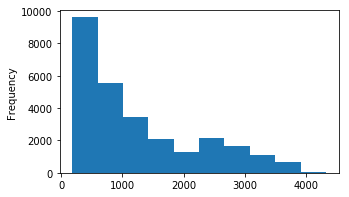

In [51]:
# let's check the age distribution for non churned customers
plt.figure(figsize=(5,3))
telecom_data.loc[telecom_data.churn==0,'aon'].plot.hist()

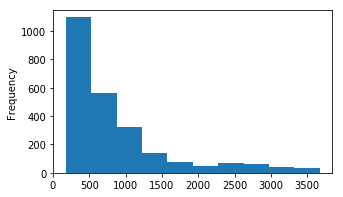

In [52]:
#Check the age distribution for churned customers
plt.figure(figsize=(5,3))
telecom_data.loc[telecom_data.churn==1,'aon'].plot.hist()

<span style='color:#14445B'> We see from above that most of the churn cases are happening before age 1500 days.</span>

In [53]:
#Check the circle id values
telecom_data.circle_id.unique()

#drop this column as there is only one circle id
telecom_data.drop('circle_id',inplace=True,axis=1)

###   Variables Related to Date -

In [54]:
#extract the date columns
date_columns = telecom_data.columns[telecom_data.columns.str.contains('date')]

# convert to datetime
for date_col in list(date_columns):
    telecom_data[date_col]= pd.to_datetime(telecom_data[date_col])
    
print(telecom_data.last_date_of_month_6.dt.day.unique(),telecom_data.last_date_of_month_7.dt.day.unique()
      ,telecom_data.last_date_of_month_8.dt.day.unique())

#as only 1 unique value last day of month is present these columns are not adding much information
#let us drop the columns
telecom_data.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'],axis=1,inplace=True)

(array([30], dtype=int64), array([31., nan]), array([31., nan]))


In [55]:
#Extract the day of last recharge
telecom_data['day_of_last_rech_6'] =  telecom_data.date_of_last_rech_6.dt.day
telecom_data['day_of_last_rech_7'] =  telecom_data.date_of_last_rech_7.dt.day
telecom_data['day_of_last_rech_8'] =  telecom_data.date_of_last_rech_8.dt.day

dt_of_last_rech_cols = ['day_of_last_rech_6','day_of_last_rech_7','day_of_last_rech_8']

pd.DataFrame([telecom_data.loc[telecom_data.churn==0,dt_of_last_rech_cols].median()
              ,telecom_data.loc[telecom_data.churn==1,dt_of_last_rech_cols].median()],index={'Non Churned','Churned'})

,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8
Non Churned,28.0,29.0,29.0
Churned,28.0,27.0,26.0


<span style='color:#14445B'>Here the median value for last recharge is bit lower for churned customers </span>

In [56]:
#Define a new derived column indicating the shift in day of last recharge

telecom_data['day_of_last_rech_shift'] = telecom_data.day_of_last_rech_8 -(telecom_data.day_of_last_rech_6+telecom_data.day_of_last_rech_7)/2

# let's check how the shift indicates pattern for Churned and non churn customers
pd.DataFrame([telecom_data.loc[telecom_data.churn==0,['day_of_last_rech_shift']].median()
              ,telecom_data.loc[telecom_data.churn==1,['day_of_last_rech_shift']].median()],index={'Non Churned','Churned'})

,day_of_last_rech_shift
Non Churned,0.5
Churned,-2.0


<span style='color:#14445B'> We can notice here that a large negative shift is highly indicative of churn</span>

In [57]:
#Time to delete the other colummns derived as are no longer required
telecom_data.drop(['day_of_last_rech_6','day_of_last_rech_7','day_of_last_rech_8'],axis=1,inplace=True)

In [58]:
# let's extract the day of last recharge for data
telecom_data['day_of_last_rech_data_6'] =  telecom_data.date_of_last_rech_data_6.dt.day
telecom_data['day_of_last_rech_data_7'] =  telecom_data.date_of_last_rech_data_7.dt.day
telecom_data['day_of_last_rech_data_8'] =  telecom_data.date_of_last_rech_data_8.dt.day

dt_of_last_rech_cols = ['day_of_last_rech_data_6','day_of_last_rech_data_7','day_of_last_rech_data_8']

pd.DataFrame([telecom_data.loc[telecom_data.churn==0,dt_of_last_rech_cols].median()
              ,telecom_data.loc[telecom_data.churn==1,dt_of_last_rech_cols].median()],index={'Non Churned','Churned'})

,day_of_last_rech_data_6,day_of_last_rech_data_7,day_of_last_rech_data_8
Non Churned,22.0,24.0,23.0
Churned,22.0,20.0,15.0


In [59]:
#Define a new derived column indicating the shift in day of last data recharge

telecom_data['day_of_last_rech_data_shift'] = telecom_data.day_of_last_rech_data_8 -(telecom_data.day_of_last_rech_data_6+telecom_data.day_of_last_rech_data_7)/2

#Check how the shift indicates pattern for Churned & non churn customers
pd.DataFrame([telecom_data.loc[telecom_data.churn==0,['day_of_last_rech_data_shift']].median()
              ,telecom_data.loc[telecom_data.churn==1,['day_of_last_rech_data_shift']].median()],index={'Non Churned','Churned'})

,day_of_last_rech_data_shift
Non Churned,-0.5
Churned,-6.0


In [60]:
#Delete the other colummns derived as are no longer required
telecom_data.drop(['day_of_last_rech_data_6','day_of_last_rech_data_7','day_of_last_rech_data_8'],axis=1,inplace=True)

#Drop the date columns as we have derived day of month variables from them
telecom_data.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'],axis=1,inplace=True)
telecom_data.drop(['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'],axis=1,inplace=True)

### Average Revenue Per User -

Churn Stats (mean and standard deviation):
{8: 'arpu_8', 6: 'arpu_6', 7: 'arpu_7'}


,mean_6,mean_7,mean_8,std_6,std_7,std_8
Non Churned,549.220,562.608,532.636,446.851,474.005,503.944
Churned,663.158,540.166,237.201,584.538,540.367,386.441


<Figure size 1440x720 with 0 Axes>

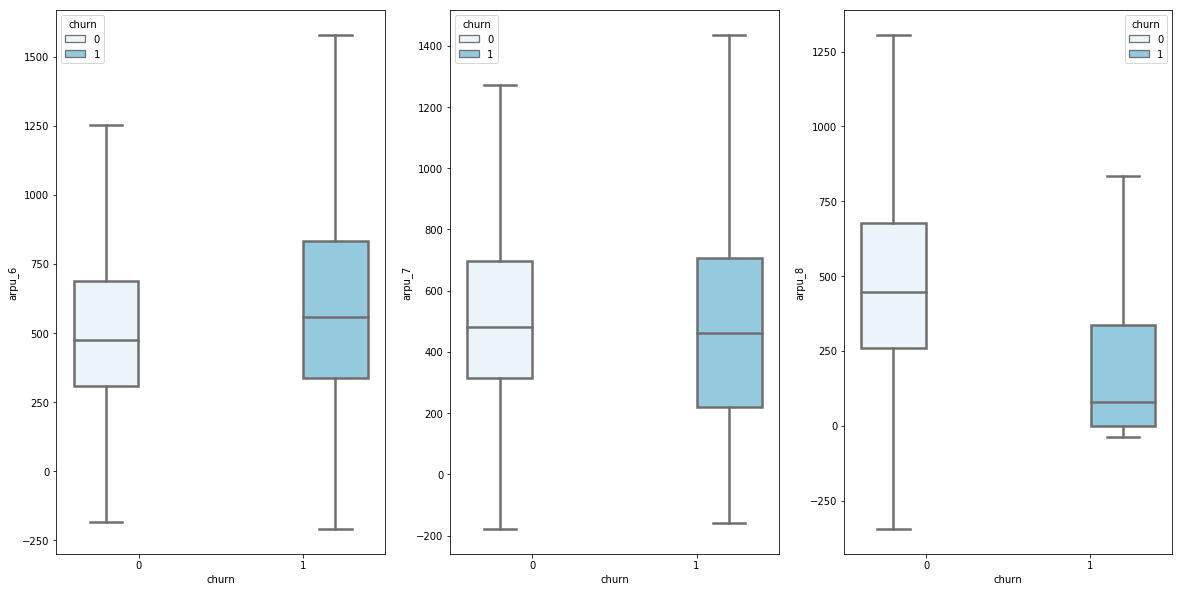

In [61]:
#Extract columns for average revenue per user
arpu_cols = telecom_data.columns[telecom_data.columns.str.contains('arpu_')]

#Analyze arpu
analyze_feature('arpu')

<span style='color:#14445B'>Clearly arpu also drops signficantly in action phase for churned customers</span>

In [62]:
#Define new derived columns
#arpu for good phase: arpu_good_ph
telecom_data['arpu_good_ph'] = (telecom_data.arpu_6 + telecom_data.arpu_7)/2

#Drop the original columns as these are not longer required
telecom_data.drop(['arpu_6','arpu_7'],axis=1,inplace=True)

### Minutes of Usage related Variables -

In [63]:
#Derive minutes of usage columns.
mou_cols = telecom_data.columns[telecom_data.columns.str.contains('mou')]
mou_cols

Index([u'loc_og_t2o_mou', u'std_og_t2o_mou', u'loc_ic_t2o_mou', u'onnet_mou_6',
       u'onnet_mou_7', u'onnet_mou_8', u'offnet_mou_6', u'offnet_mou_7',
       u'offnet_mou_8', u'roam_ic_mou_6', u'roam_ic_mou_7', u'roam_ic_mou_8',
       u'roam_og_mou_6', u'roam_og_mou_7', u'roam_og_mou_8',
       u'loc_og_t2t_mou_6', u'loc_og_t2t_mou_7', u'loc_og_t2t_mou_8',
       u'loc_og_t2m_mou_6', u'loc_og_t2m_mou_7', u'loc_og_t2m_mou_8',
       u'loc_og_t2f_mou_6', u'loc_og_t2f_mou_7', u'loc_og_t2f_mou_8',
       u'loc_og_t2c_mou_6', u'loc_og_t2c_mou_7', u'loc_og_t2c_mou_8',
       u'loc_og_mou_6', u'loc_og_mou_7', u'loc_og_mou_8', u'std_og_t2t_mou_6',
       u'std_og_t2t_mou_7', u'std_og_t2t_mou_8', u'std_og_t2m_mou_6',
       u'std_og_t2m_mou_7', u'std_og_t2m_mou_8', u'std_og_t2f_mou_6',
       u'std_og_t2f_mou_7', u'std_og_t2f_mou_8', u'std_og_t2c_mou_6',
       u'std_og_t2c_mou_7', u'std_og_t2c_mou_8', u'std_og_mou_6',
       u'std_og_mou_7', u'std_og_mou_8', u'isd_og_mou_6', u'isd_og_mou_7'

In [64]:
#Check if there are any zero variation columns among these.
zero_var_cols = telecom_data.loc[:,mou_cols].std()[telecom_data.loc[:,mou_cols].std()==0].index.values

zero_var_cols

array([u'loc_og_t2o_mou', u'std_og_t2o_mou', u'loc_ic_t2o_mou',
       u'std_og_t2c_mou_6', u'std_og_t2c_mou_7', u'std_og_t2c_mou_8',
       u'std_ic_t2o_mou_6', u'std_ic_t2o_mou_7', u'std_ic_t2o_mou_8'],
      dtype=object)

In [65]:
#Drop these columns.
telecom_data.drop(list(zero_var_cols),axis=1,inplace=True)

#Check the % of null values among mou variables.
mou_cols = telecom_data.columns[telecom_data.columns.str.contains('mou')]
100*telecom_data.loc[:,mou_cols].isnull().sum()/len(telecom_data.loc[:,mou_cols])

onnet_mou_6         1.816606
onnet_mou_7         1.789940
onnet_mou_8         3.913203
offnet_mou_6        1.816606
offnet_mou_7        1.789940
offnet_mou_8        3.913203
roam_ic_mou_6       1.816606
roam_ic_mou_7       1.789940
roam_ic_mou_8       3.913203
roam_og_mou_6       1.816606
roam_og_mou_7       1.789940
roam_og_mou_8       3.913203
loc_og_t2t_mou_6    1.816606
loc_og_t2t_mou_7    1.789940
loc_og_t2t_mou_8    3.913203
loc_og_t2m_mou_6    1.816606
loc_og_t2m_mou_7    1.789940
loc_og_t2m_mou_8    3.913203
loc_og_t2f_mou_6    1.816606
loc_og_t2f_mou_7    1.789940
loc_og_t2f_mou_8    3.913203
loc_og_t2c_mou_6    1.816606
loc_og_t2c_mou_7    1.789940
loc_og_t2c_mou_8    3.913203
loc_og_mou_6        1.816606
loc_og_mou_7        1.789940
loc_og_mou_8        3.913203
std_og_t2t_mou_6    1.816606
std_og_t2t_mou_7    1.789940
std_og_t2t_mou_8    3.913203
                      ...   
loc_ic_t2m_mou_6    1.816606
loc_ic_t2m_mou_7    1.789940
loc_ic_t2m_mou_8    3.913203
loc_ic_t2f_mou

In [66]:
#Check the maximum % of missing value
100*telecom_data.loc[:,mou_cols].isnull().sum().max()/len(telecom_data.loc[:,mou_cols])

3.913202893236892

<span style='color:#14445B'>For all minutes of usage columns the maximum missing % is 3 which seems that in these case the mobile has not been used at all for that particular call type(ic,std etc.) thus it is safe to assume that we can impute the missing values with 0. </span>

In [67]:
#Now Replaceing null values by 0 for minutes of usage variables
telecom_data.loc[:,mou_cols] = telecom_data.loc[:,mou_cols].replace(np.NaN,0)

<span style='color:#14445B'> Lets now now analyze the sub groups of minutes of usage, following groups are there: </span>

- offnet: all kinds of calls outside operator network
- onnet: all kinds of call within same operator network
- og: outgoing calls
- ic: incoming calls

<span style='color:#14445B'>Now let us start by analyzing minutes for usage variables for month 6. </span>

In [68]:
#Collect mou variables for month 6
mou_6 = telecom_data.columns[telecom_data.columns.str.contains('mou_6')]
mou_6

Index([u'onnet_mou_6', u'offnet_mou_6', u'roam_ic_mou_6', u'roam_og_mou_6',
       u'loc_og_t2t_mou_6', u'loc_og_t2m_mou_6', u'loc_og_t2f_mou_6',
       u'loc_og_t2c_mou_6', u'loc_og_mou_6', u'std_og_t2t_mou_6',
       u'std_og_t2m_mou_6', u'std_og_t2f_mou_6', u'std_og_mou_6',
       u'isd_og_mou_6', u'spl_og_mou_6', u'total_og_mou_6',
       u'loc_ic_t2t_mou_6', u'loc_ic_t2m_mou_6', u'loc_ic_t2f_mou_6',
       u'loc_ic_mou_6', u'std_ic_t2t_mou_6', u'std_ic_t2m_mou_6',
       u'std_ic_t2f_mou_6', u'std_ic_mou_6', u'total_ic_mou_6',
       u'spl_ic_mou_6', u'isd_ic_mou_6'],
      dtype='object')

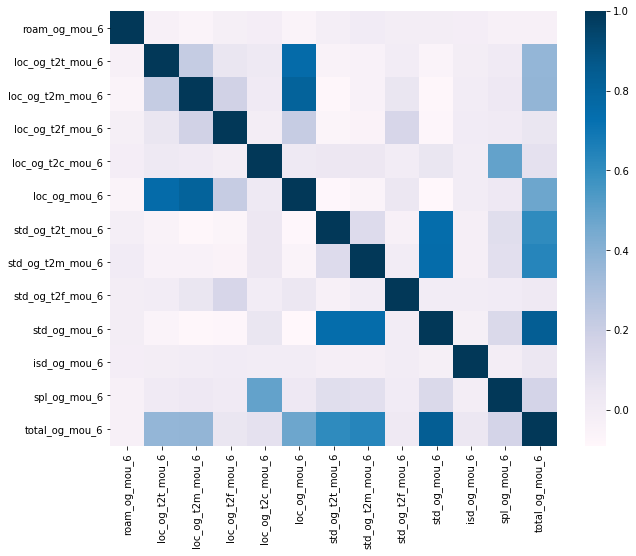

In [69]:
#Check the outgoing mou variables.
mou_og_cols6 = telecom_data.columns[telecom_data.columns.str.contains('.*_og_.*mou_6',regex=True)]

# let us create a correlation matrix heatmap among quantitative varibales
plt.figure(figsize=(10, 8))
sns.heatmap(telecom_data.loc[:,mou_og_cols6].corr(), cmap="PuBu")
plt.show()

<span style='color:#14445B'>After analyzing the variables we acertain the following relationships among variables - </span>

- total_og_mou_6 = loc_og_mou_6+std_og_mou_6+spl_og_mou_6+isd_og_mou_6+ roam_og_mou_6+og_others_6
- loc_og_mou_6 = loc_og_t2m_mou_6+loc_og_t2t_mou_6+loc_og_t2f_mou_6 + loc_og_2tc_mou_6
- std_og_mou_6 = std_og_t2m_mou_6+std_og_t2t_mou_6+std_og_t2f_mou_6 + std_og_2tc_mou_6


In [70]:
print(telecom_data.loc[7,'total_og_mou_6'],telecom_data.loc[7,['loc_og_mou_6','std_og_mou_6','spl_og_mou_6','isd_og_mou_6','og_others_6']].sum())
print(telecom_data.loc[7,'std_og_mou_6'],telecom_data.loc[7,['std_og_t2m_mou_6','std_og_t2t_mou_6','std_og_t2f_mou_6','std_og_loc_mou_6']].sum())
print(telecom_data.loc[7,'loc_og_mou_6'],telecom_data.loc[7,['loc_og_t2m_mou_6','loc_og_t2t_mou_6','loc_og_t2f_mou_6','loc_og_2tc_mou_6']].sum())

(487.53, 487.52000000000004)
(60.86, 60.849999999999994)
(422.16, 422.15)


In [71]:
#total_og_mou_6, std_og_mou_6 and loc_og_mou_6 already have component variables present in dataset
#Removing these columns for all months from the data set

ls_total_og_cols = telecom_data.columns[telecom_data.columns.str.contains('total_og_mou|std_og_mou|loc_og_mou',regex=True)]
print(ls_total_og_cols)
telecom_data.drop(ls_total_og_cols,axis=1,inplace=True)

Index([u'loc_og_mou_6', u'loc_og_mou_7', u'loc_og_mou_8', u'std_og_mou_6',
       u'std_og_mou_7', u'std_og_mou_8', u'total_og_mou_6', u'total_og_mou_7',
       u'total_og_mou_8'],
      dtype='object')


In [72]:
#Defining good phase derived variables for all og components.
telecom_data['spl_og_mou_good_ph'] = (telecom_data.spl_og_mou_6 + telecom_data.spl_og_mou_7)/2
telecom_data['isd_og_mou_good_ph'] = (telecom_data.isd_og_mou_6 + telecom_data.isd_og_mou_7)/2
telecom_data['roam_og_mou_good_ph'] = (telecom_data.roam_og_mou_6 + telecom_data.roam_og_mou_7)/2
telecom_data['std_og_t2m_mou_good_ph'] = (telecom_data.std_og_t2m_mou_6 + telecom_data.std_og_t2m_mou_7)/2
telecom_data['std_og_t2t_mou_good_ph'] = (telecom_data.std_og_t2t_mou_6 + telecom_data.std_og_t2t_mou_7)/2
telecom_data['std_og_t2f_mou_good_ph'] = (telecom_data.std_og_t2f_mou_6 + telecom_data.std_og_t2f_mou_7)/2

telecom_data['loc_og_t2m_mou_good_ph'] = (telecom_data.loc_og_t2m_mou_6 + telecom_data.loc_og_t2m_mou_7)/2
telecom_data['loc_og_t2t_mou_good_ph'] = (telecom_data.loc_og_t2t_mou_6 + telecom_data.loc_og_t2t_mou_7)/2
telecom_data['loc_og_t2f_mou_good_ph'] = (telecom_data.loc_og_t2f_mou_6 + telecom_data.loc_og_t2f_mou_7)/2
telecom_data['loc_og_t2c_mou_good_ph'] = (telecom_data.loc_og_t2c_mou_6 + telecom_data.loc_og_t2c_mou_7)/2



# drop all the original og mou variables
ls_og = telecom_data.columns[telecom_data.columns.str.contains('.*_og_.*mou_6|.*_og_.*mou_7',regex=True)]

print(ls_og)

telecom_data.drop(ls_og,axis=1,inplace=True)

Index([u'roam_og_mou_6', u'roam_og_mou_7', u'loc_og_t2t_mou_6',
       u'loc_og_t2t_mou_7', u'loc_og_t2m_mou_6', u'loc_og_t2m_mou_7',
       u'loc_og_t2f_mou_6', u'loc_og_t2f_mou_7', u'loc_og_t2c_mou_6',
       u'loc_og_t2c_mou_7', u'std_og_t2t_mou_6', u'std_og_t2t_mou_7',
       u'std_og_t2m_mou_6', u'std_og_t2m_mou_7', u'std_og_t2f_mou_6',
       u'std_og_t2f_mou_7', u'isd_og_mou_6', u'isd_og_mou_7', u'spl_og_mou_6',
       u'spl_og_mou_7'],
      dtype='object')


### Check for Incoming MOU Variables -

In [73]:
mou_ic_cols6 = telecom_data.columns[telecom_data.columns.str.contains('.*_ic_.*mou_6',regex=True)]
mou_ic_cols6

Index([u'roam_ic_mou_6', u'loc_ic_t2t_mou_6', u'loc_ic_t2m_mou_6',
       u'loc_ic_t2f_mou_6', u'loc_ic_mou_6', u'std_ic_t2t_mou_6',
       u'std_ic_t2m_mou_6', u'std_ic_t2f_mou_6', u'std_ic_mou_6',
       u'total_ic_mou_6', u'spl_ic_mou_6', u'isd_ic_mou_6'],
      dtype='object')

<span style='color:#14445B'>As with og mou variables above, we observe the following relationship among ic (incoming)mou variables- </span>

- total_ic_mou_6 = loc_ic_mou_6 + std_ic_mou_6 + roam_ic_mou_6 + isd_ic_mou_6 + spl_ic_mou_6 + ic_others_6
- std_ic_mou_6 = std_ic_t2t_mou_6 + std_ic_t2m_mou_6 + std_ic_t2f_mou_6+std_ic_t2c_mou_6
- loc_ic_mou_6 = loc_ic_t2t_mou_6 + loc_ic_t2m_mou_6+loc_ic_t2f_mou_6+loc_ic_t2c_mou_6


In [74]:
print(telecom_data.loc[7,'total_ic_mou_6'],telecom_data.loc[7,['loc_ic_mou_6','roam_ic_mou_6','isd_ic_mou_6','spl_ic_mou_6','std_ic_mou_6']].sum())
print(telecom_data.loc[7,'loc_ic_mou_6'],telecom_data.loc[7,['loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6','loc_ic_t2c_mou_6']].sum())
print(telecom_data.loc[7,'std_ic_mou_6'],telecom_data.loc[7,['std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6','std_ic_t2c_mou_6']].sum())

(626.46, 626.92)
(427.88, 427.86)
(180.54, 180.51999999999998)


In [75]:
#total_ic_mou_6, std_ic_mou_6 and loc_ic_mou_6 already have component variables present in dataset
#let us remove these columns for all months from the data set

ls_total_ic_cols = telecom_data.columns[telecom_data.columns.str.contains('total_ic_mou|std_ic_mou|loc_ic_mou',regex=True)]
print(ls_total_ic_cols)
telecom_data.drop(ls_total_ic_cols,axis=1,inplace=True)

Index([u'loc_ic_mou_6', u'loc_ic_mou_7', u'loc_ic_mou_8', u'std_ic_mou_6',
       u'std_ic_mou_7', u'std_ic_mou_8', u'total_ic_mou_6', u'total_ic_mou_7',
       u'total_ic_mou_8'],
      dtype='object')


In [76]:
#Defining good phase derive variables for all ic components:
telecom_data['spl_ic_mou_good_ph'] = (telecom_data.spl_ic_mou_6 + telecom_data.spl_ic_mou_7)/2
telecom_data['isd_ic_mou_good_ph'] = (telecom_data.isd_ic_mou_6 + telecom_data.isd_ic_mou_7)/2
telecom_data['roam_ic_mou_good_ph'] = (telecom_data.roam_ic_mou_6 + telecom_data.roam_ic_mou_7)/2
telecom_data['std_ic_t2m_mou_good_ph'] = (telecom_data.std_ic_t2m_mou_6 + telecom_data.std_ic_t2m_mou_7)/2
telecom_data['std_ic_t2t_mou_good_ph'] = (telecom_data.std_ic_t2t_mou_6 + telecom_data.std_ic_t2t_mou_7)/2
telecom_data['std_ic_t2f_mou_good_ph'] = (telecom_data.std_ic_t2f_mou_6 + telecom_data.std_ic_t2f_mou_7)/2

telecom_data['loc_ic_t2m_mou_good_ph'] = (telecom_data.loc_ic_t2m_mou_6 + telecom_data.loc_ic_t2m_mou_7)/2
telecom_data['loc_ic_t2t_mou_good_ph'] = (telecom_data.loc_ic_t2t_mou_6 + telecom_data.loc_ic_t2t_mou_7)/2
telecom_data['loc_ic_t2f_mou_good_ph'] = (telecom_data.loc_ic_t2f_mou_6 + telecom_data.loc_ic_t2f_mou_7)/2

In [77]:
# drop all the original og mou variables
ls_ic = telecom_data.columns[telecom_data.columns.str.contains('.*_ic_.*mou_6|.*_ic_.*mou_7',regex=True)]

print(ls_ic)

telecom_data.drop(ls_ic,axis=1,inplace=True)

Index([u'roam_ic_mou_6', u'roam_ic_mou_7', u'loc_ic_t2t_mou_6',
       u'loc_ic_t2t_mou_7', u'loc_ic_t2m_mou_6', u'loc_ic_t2m_mou_7',
       u'loc_ic_t2f_mou_6', u'loc_ic_t2f_mou_7', u'std_ic_t2t_mou_6',
       u'std_ic_t2t_mou_7', u'std_ic_t2m_mou_6', u'std_ic_t2m_mou_7',
       u'std_ic_t2f_mou_6', u'std_ic_t2f_mou_7', u'spl_ic_mou_6',
       u'spl_ic_mou_7', u'isd_ic_mou_6', u'isd_ic_mou_7'],
      dtype='object')


### Offnet Usage -

Churn Stats (mean and standard deviation):
{8: 'offnet_mou_8', 6: 'offnet_mou_6', 7: 'offnet_mou_7'}


,mean_6,mean_7,mean_8,std_6,std_7,std_8
Non Churned,365.046,377.810,352.510,463.187,489.360,490.182
Churned,471.331,381.416,138.249,655.048,596.465,317.998


<Figure size 1440x720 with 0 Axes>

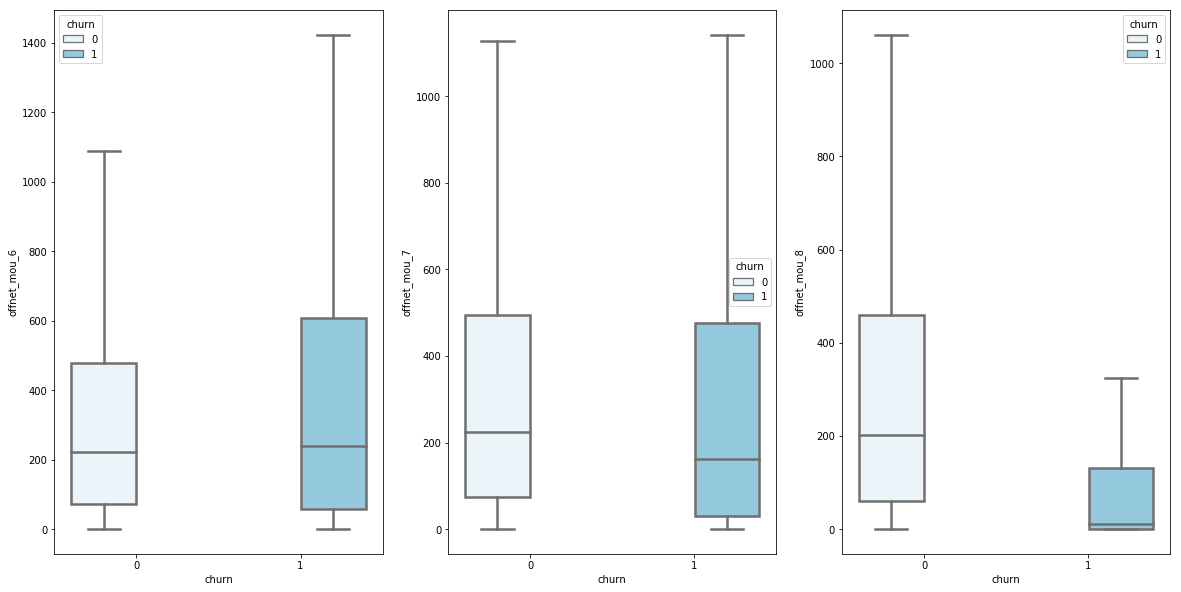

In [78]:
 offnet_cols = telecom_data.columns[telecom_data.columns.str.contains('offnet',regex=True)]
    
#lets see the Offnet mou values for churned and non churned customers
analyze_feature('offnet_mou')

<span style='color:#14445B'> We can see there is a substantial decrease in offnet mou for action month.</span>

In [79]:
#Define new derived column
#minutes of usage for good phase: onnet_mou_good_ph
telecom_data['offnet_mou_good_ph'] = (telecom_data.offnet_mou_6 + telecom_data.offnet_mou_7)/2

# drop the original columns as these are not longer required
telecom_data.drop(['offnet_mou_6','offnet_mou_7'],axis=1,inplace=True)

### Minutes of usage related variables within same Operator Network -

In [80]:
#let's extract the minutes of usage related columns
onnet_cols =  telecom_data.columns[telecom_data.columns.str.contains('^onnet.*mou',regex=True)]

Churn Stats (mean and standard deviation):
{8: 'onnet_mou_8', 6: 'onnet_mou_6', 7: 'onnet_mou_7'}


,mean_6,mean_7,mean_8,std_6,std_7,std_8
Non Churned,251.204,265.641,244.819,442.807,474.160,465.992
Churned,369.058,292.408,113.227,608.456,541.016,339.978


<Figure size 1440x720 with 0 Axes>

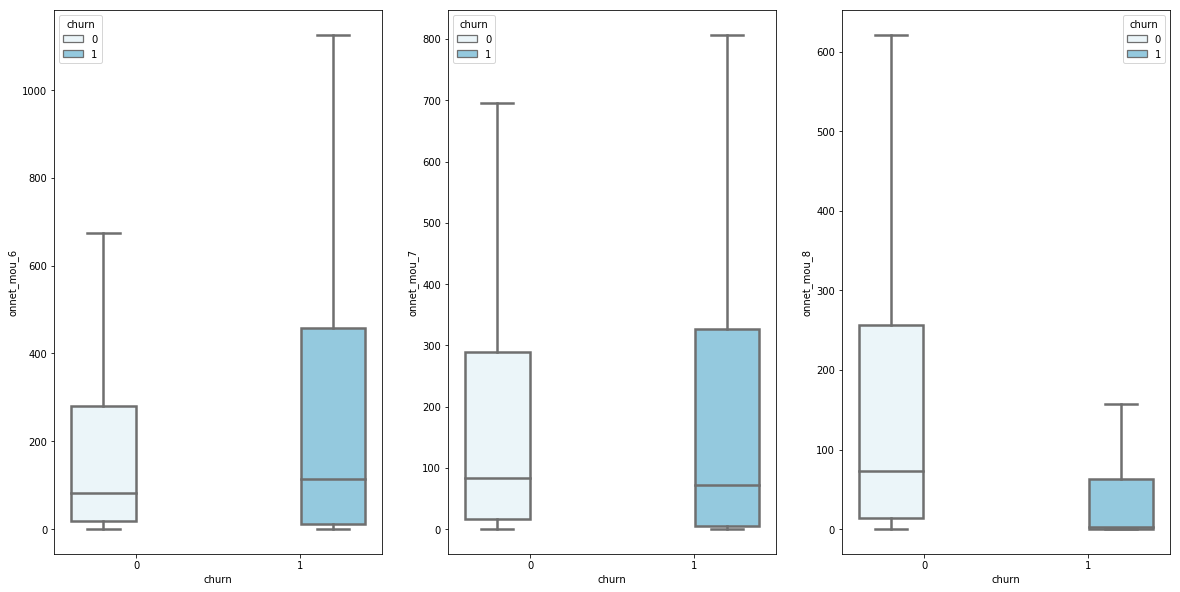

In [81]:
# let's analyze for offnet mou values for churned and non churned customers
analyze_feature('onnet_mou')

<span style='color:#14445B'>We again see that there is a drop in minutes of usage in the action month (8th month) for churned customers. </span>

In [82]:
#Define new derived column.
#minutes of usage for good phase: onnet_mou_good_ph
telecom_data['onnet_mou_good_ph'] = (telecom_data.onnet_mou_6 + telecom_data.onnet_mou_7)/2

#Drop the original columns.
telecom_data.drop(['onnet_mou_6','onnet_mou_7'],axis=1,inplace=True)

In [83]:
#Checking summary stats for oc others & ic others mou
ls_others = telecom_data.columns[telecom_data.columns.str.contains('_others')]
print(telecom_data.loc[:,ls_others].describe())

        og_others_6   og_others_7   og_others_8   ic_others_6   ic_others_7  \
count  29456.000000  29464.000000  28827.000000  29456.000000  29464.000000   
mean       0.673323      0.043687      0.059953      1.174790      1.527682   
std        4.144797      2.701071      3.381939     14.113843     16.141140   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.060000      0.000000   
max      609.810000    370.130000    394.930000   1344.140000   1495.940000   

        ic_others_8  
count  28827.000000  
mean       1.274322  
std       13.038515  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.060000  
max     1209.860000  


<span style='color:#14445B'> We could see from above that very few values are availabe for oc_others & ic_others.</span>

In [84]:
#Defining two new derived columns
#OG others for good phase: og_others_good_ph
#IC otherd for good phase: ic_others_good_ph
telecom_data['og_others_good_ph'] = (telecom_data.og_others_6 + telecom_data.og_others_7)/2
telecom_data['ic_others_good_ph'] = (telecom_data.ic_others_6 + telecom_data.ic_others_6)/2


#drop the original columns. We don't need them
telecom_data.drop(['og_others_6','og_others_7','ic_others_6','ic_others_7'],axis=1,inplace=True)

In [85]:
#Check if there are any more columns with more than 20% NA values remaining.
is_more_than_20 = telecom_data.isnull().sum()/len(telecom_data) > 0.2
100*telecom_data.loc[:,is_more_than_20].isnull().sum()/len(telecom_data.loc[:,is_more_than_20])

night_pck_user_6               44.148528
night_pck_user_7               43.145228
night_pck_user_8               46.825106
fb_user_6                      44.148528
fb_user_7                      43.145228
fb_user_8                      46.825106
day_of_last_rech_data_shift    59.904670
dtype: float64

In [86]:
#Droping these columns as we have already captured internet volume usage & total data amount recharged.
#also we have captured day of last recharge shift as well.
telecom_data.drop(telecom_data.columns[is_more_than_20],axis=1,inplace=True)

In [87]:
#Checking how many variables are remaining.
telecom_data.shape

(30001, 78)

In [88]:
is_na = telecom_data.isnull().sum()/len(telecom_data) > 0
100*telecom_data.loc[:,is_na].isnull().sum()/len(telecom_data.loc[:,is_na])

og_others_8               3.913203
ic_others_8               3.913203
day_of_last_rech_shift    2.306590
og_others_good_ph         2.606580
ic_others_good_ph         1.816606
dtype: float64

<span style='color:#14445B'> We have very few values with NA indicating that there is no usage in these variables by customer. Lets convert these values by 0. <span>

In [89]:
telecom_data.loc[:,:] = telecom_data.loc[:,:].replace(np.NaN,0)

### Predictive Model Building -

<span style='color:#14445B'>Now finally it's time to build multiple machine learning models in order to accurately predict customers who might churn in the action phase ie., 8th Month</span>

In [90]:
#Assigning feature variable to X
X = telecom_data.drop(['churn','mobile_number'],axis=1)

#Assigning response variable to y
y = telecom_data['churn']

### Additional Feature Engineering -

<span style='color:#14445B'>We need to add some additional feature transformation to achieve better accuracy in this predictive model. We know from EDA above that a drop in action phase parameter as compared to good phase value is highly indicative of a likely churn. Let's use this heuristic to derive action phase column which is actually the difference between good phase feature value and action phase i.e., 8th month feature value & discard the 8th month feature columns. </span>

In [91]:
#Extract good phase feature list & 8th month feature list
f_good_ph = X.loc[:,X.columns.str.contains('good_ph')]
f_8 = X.loc[:,X.columns.str.contains('_8')]

print(f_good_ph.columns.values)
print(f_8.columns.values)

['total_rech_amt_good_ph' 'total_rech_amt_data_good_ph'
 'max_rech_amt_good_ph' 'last_day_rch_amt_good_ph' 'max_rech_data_good_ph'
 'total_rech_num_good_ph' 'vol_2g_mb_good_ph' 'vol_3g_mb_good_ph'
 'monthly_2g_good_ph' 'monthly_3g_good_ph' 'vbc_3g_good_ph'
 'sachet_2g_good_ph' 'sachet_3g_good_ph' 'arpu_good_ph'
 'spl_og_mou_good_ph' 'isd_og_mou_good_ph' 'roam_og_mou_good_ph'
 'std_og_t2m_mou_good_ph' 'std_og_t2t_mou_good_ph'
 'std_og_t2f_mou_good_ph' 'loc_og_t2m_mou_good_ph'
 'loc_og_t2t_mou_good_ph' 'loc_og_t2f_mou_good_ph'
 'loc_og_t2c_mou_good_ph' 'spl_ic_mou_good_ph' 'isd_ic_mou_good_ph'
 'roam_ic_mou_good_ph' 'std_ic_t2m_mou_good_ph' 'std_ic_t2t_mou_good_ph'
 'std_ic_t2f_mou_good_ph' 'loc_ic_t2m_mou_good_ph'
 'loc_ic_t2t_mou_good_ph' 'loc_ic_t2f_mou_good_ph' 'offnet_mou_good_ph'
 'onnet_mou_good_ph' 'og_others_good_ph' 'ic_others_good_ph']
[u'arpu_8' u'onnet_mou_8' u'offnet_mou_8' u'roam_ic_mou_8'
 u'roam_og_mou_8' u'loc_og_t2t_mou_8' u'loc_og_t2m_mou_8'
 u'loc_og_t2f_mou_8' u'loc

In [92]:
#Function to calculate difference between 8th month feature & good phase feature
def FindDifference (x,y):      
    diff = 0.00
    if np.isnan(x) and np.isnan(y):
        diff = np.NAN
    elif np.isnan(y) and ~np.isnan(x):
        diff = x
    elif ~np.isnan(y)and np.isnan(x):
        diff = -y
    else:
        diff = x-y

    return(diff)    

In [93]:
#Lets create a feature data frame copy from original features
X_diff = X.copy()
X_diff.columns.values

array([u'arpu_8', u'onnet_mou_8', u'offnet_mou_8', u'roam_ic_mou_8',
       u'roam_og_mou_8', u'loc_og_t2t_mou_8', u'loc_og_t2m_mou_8',
       u'loc_og_t2f_mou_8', u'loc_og_t2c_mou_8', u'std_og_t2t_mou_8',
       u'std_og_t2m_mou_8', u'std_og_t2f_mou_8', u'isd_og_mou_8',
       u'spl_og_mou_8', u'og_others_8', u'loc_ic_t2t_mou_8',
       u'loc_ic_t2m_mou_8', u'loc_ic_t2f_mou_8', u'std_ic_t2t_mou_8',
       u'std_ic_t2m_mou_8', u'std_ic_t2f_mou_8', u'spl_ic_mou_8',
       u'isd_ic_mou_8', u'ic_others_8', u'total_rech_num_8',
       u'total_rech_amt_8', u'max_rech_amt_8', u'last_day_rch_amt_8',
       u'max_rech_data_8', u'vol_2g_mb_8', u'vol_3g_mb_8',
       u'monthly_2g_8', u'sachet_2g_8', u'monthly_3g_8', u'sachet_3g_8',
       u'aon', 'vbc_3g_8', 'total_rech_amt_data_8',
       'total_rech_amt_good_ph', 'total_rech_amt_data_good_ph',
       'max_rech_amt_good_ph', 'last_day_rch_amt_good_ph',
       'max_rech_data_good_ph', 'total_rech_num_good_ph',
       'vol_2g_mb_good_ph', 'vol_3g

In [94]:
#Extracting features without any good phase or 8th month indicator.
features_to_explore = set(map(lambda x: x.replace("_good_ph", ""), f_good_ph))
features_to_explore

{'arpu',
 'ic_others',
 'isd_ic_mou',
 'isd_og_mou',
 'last_day_rch_amt',
 'loc_ic_t2f_mou',
 'loc_ic_t2m_mou',
 'loc_ic_t2t_mou',
 'loc_og_t2c_mou',
 'loc_og_t2f_mou',
 'loc_og_t2m_mou',
 'loc_og_t2t_mou',
 'max_rech_amt',
 'max_rech_data',
 'monthly_2g',
 'monthly_3g',
 'offnet_mou',
 'og_others',
 'onnet_mou',
 'roam_ic_mou',
 'roam_og_mou',
 'sachet_2g',
 'sachet_3g',
 'spl_ic_mou',
 'spl_og_mou',
 'std_ic_t2f_mou',
 'std_ic_t2m_mou',
 'std_ic_t2t_mou',
 'std_og_t2f_mou',
 'std_og_t2m_mou',
 'std_og_t2t_mou',
 'total_rech_amt',
 'total_rech_amt_data',
 'total_rech_num',
 'vbc_3g',
 'vol_2g_mb',
 'vol_3g_mb'}

In [95]:
#Creating new derived columns for action phase
for feat in features_to_explore:
    X_diff[feat+'_act_ph']= np.vectorize(FindDifference)(X_diff[feat+'_8'], X_diff[feat+'_good_ph'])

In [96]:
#Droping 8th month columns since we have already derived action phase columns and don't it anymore.
X_diff.drop(f_8,axis=1,inplace=True)

### Feature Standardisation -

In [97]:
from sklearn.preprocessing import StandardScaler

#Extract columns
cols = X_diff.columns

#Apply standard scalar
scaler = StandardScaler()

#Produce scaled features
X_scaled = scaler.fit_transform(X_diff)

#Convert to data frame
X_scaled = pd.DataFrame(X_diff, columns=cols)

In [98]:
#Splitting the data into train & test as usual 
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, train_size=0.7,test_size=0.3,random_state=100)

<span style='color:#14445B'> Defining a function to print evaluation metrics. We have customer churn as positive class (1) we would try to maximize sensitivity at the same time trying to keep auc_score at a good level.</span>

In [99]:
from sklearn.metrics import confusion_matrix,roc_auc_score,f1_score

#Defining a function to calculate & print model metrics.
def printMetrics(y_test,y_pred):
    cp = confusion_matrix(y_test,y_pred)
    sensitivity = cp[1,1]/(cp[1,0]+cp[1,1])
    specificity =  cp[0,0]/(cp[0,1]+cp[0,0])
    precision = cp[1,1]/(cp[0,1]+cp[1,1])
    
    #Print model metrics
    print("Confusion Matrix:")
    print(cp)
    print("AUC Score: ", roc_auc_score(y_test,y_pred)) 
    print("Precision: ",precision)
    print("f1 Score: ",f1_score(y_test,y_pred))
    print("Sensitivity: ", sensitivity)
    print("Specificity: ",specificity)

In [100]:
#Building as basic logistic regression model :)
from sklearn.linear_model import LogisticRegression
lsr = LogisticRegression()
lsr.fit(X_train,y_train)

#Predict results on test
y_pred = lsr.predict(X_test)

In [101]:
#Now print model evaluation metrics -
printMetrics(y_test,y_pred)

Confusion Matrix:
[[8147  104]
 [ 524  226]]
('AUC Score: ', 0.6443644002747142)
('Precision: ', 0.6848484848484848)
('f1 Score: ', 0.4185185185185185)
('Sensitivity: ', 0.30133333333333334)
('Specificity: ', 0.9873954672160951)


<span style='color:#14445B'> We could see sesitivity & AUC score is pretty low. This is due to the data imbalanced with only 8% values for churn. We will do imbalanced class handling in order to fix this. <span>

### Imbalanced Class Handling

<span style='color:#14445B'>We will try to reduce class imbalance by trying out two different techniques as below - </span>

- <span style='color:#14445B'>Majority Class Undersampling - By deliberately undersampling the majority class.</span>
- <span style='color:#14445B'>SMOTE resampling - By generating synthetic samples for the minority class.</span>

### SMOTE Re-sampling -

In [102]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(kind = "regular")

# SMOTE sampling the training data
X_sm, y_sm = smote.fit_sample(X_train, y_train)

### Majority Class Undersampling -

<span style='color:#14445B'>We will be now creating our own funtion for majority class undersampling. This function will randomly sample the majority class equal to the number of minority class samples from training data. </span>

In [103]:
#Creating a function to undersample majority class
def MajorityClassUnderSampler(X_train,y_train):
    # Here we create training data frame
    df_train = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)],axis=1)
    
    #Here select the minority class (in our case churn)
    df_train_minority_class  = df_train.loc[df_train.churn == 1,:]
    
    #Here create data frame with majority class samples same as minority class
    df_train_majority_undersampled = pd.concat([df_train_minority_class,df_train.loc[df_train.churn == 0,:].sample(df_train_minority_class.shape[0])])

    return df_train_majority_undersampled

In [104]:
#Creating a majority class undersampled data frame from training data
df_train_mju = MajorityClassUnderSampler(X_train,y_train)

#Extracting features and labels
X_mju = df_train_mju.drop('churn',axis=1)
y_mju = df_train_mju.churn

lsr = LogisticRegression()
lsr.fit(X_sm,y_sm)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [105]:
y_pred = lsr.predict(X_test)
printMetrics(y_test,y_pred)

Confusion Matrix:
[[6921 1330]
 [ 127  623]]
('AUC Score: ', 0.8347370419747101)
('Precision: ', 0.31899641577060933)
('f1 Score: ', 0.4609692933777285)
('Sensitivity: ', 0.8306666666666667)
('Specificity: ', 0.8388074172827537)


<span style='color:#14445B'> Time to generate model with majority class undersampling as our function is doing random sampling of majority class, let's take the average of 10 runs to find the model metrics.</span>

In [106]:
sensitivity_avg = 0
specificity_avg = 0
auc_score_avg = 0
precision_avg = 0

for i in range(0,10):
    #rus = RandomUnderSampler()
    #X_rs, y_rs = rus.fit_sample(X_train, y_train)
    df_train_mju = MajorityClassUnderSampler(X_train,y_train)
    # extract features and labels
    X_mju = df_train_mju.drop('churn',axis=1)
    y_mju = df_train_mju.churn
    lsr = LogisticRegression()
    lsr.fit(X_mju,y_mju)
    #lsr.fit(X_rs,y_rs)
    y_pred = lsr.predict(X_test)
    cp = confusion_matrix(y_test,y_pred)
    sensitivity = cp[1,1]/(cp[1,0]+cp[1,1])
    specificity =  cp[0,0]/(cp[0,1]+cp[0,0])
    precision = cp[1,1]/(cp[0,1]+cp[1,1])
    auc_score = roc_auc_score(y_test,y_pred)
    sensitivity_avg = sensitivity_avg + sensitivity
    specificity_avg = specificity_avg+ specificity
    auc_score_avg = auc_score_avg + auc_score
    precision_avg = precision_avg + precision 

In [107]:
#Printing the sores -
print('AUC Score: ',auc_score_avg/10)
print('Precision: ',precision_avg/10)  
print('Sensitivity: ',sensitivity_avg/10)
print('Specificity: ',specificity_avg/10)

('AUC Score: ', 0.8274414495212703)
('Precision: ', 0.2931447860714214)
('Sensitivity: ', 0.8388)
('Specificity: ', 0.8160828990425403)


### Dimenesionality Reduction - PCA -

<span style='color:#14445B'> Here the number of features are quite high. So let's try dimensionality reduction with PCA & try model creation on reduced feature set.</span>

In [108]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=101)

#pca.fit(X_sm)
pca.fit(X_mju)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=101,
  svd_solver='randomized', tol=0.0, whiten=False)

In [109]:
#Checking the features with top PCA components -
colnames = list(X_scaled.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,Feature,PC1,PC2
0,aon,-0.091225,-0.431930
1,total_rech_amt_good_ph,-0.056469,0.245807
2,total_rech_amt_data_good_ph,0.708908,0.028622
3,max_rech_amt_good_ph,0.000150,-0.003390
4,last_day_rch_amt_good_ph,-0.001883,-0.001590


<span style='color:#14445B'> Drawing a scree plot to determine number of features which capture the highest variance.</span>

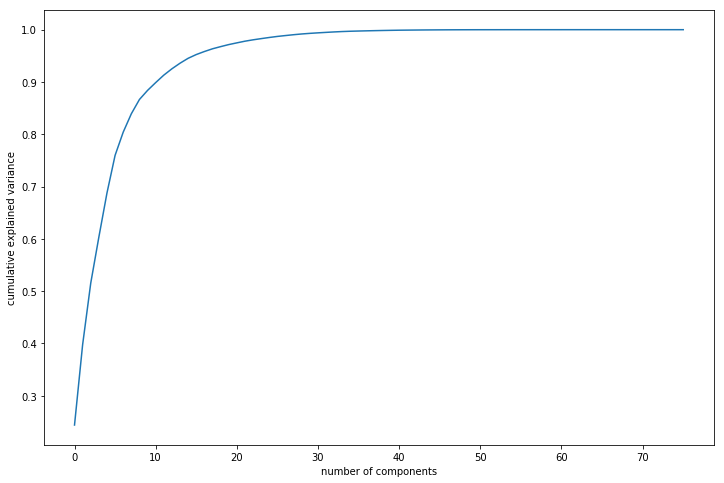

In [110]:
#plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

<span style='color:#14445B'> We see from above that around ~ 60 features capture 90% variance, let's reduce our feature set to 60 </span>

In [111]:
#Using incremental PCA for efficiency. It saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=40)

X_train_pca = pca_final.fit_transform(X_mju)

X_train_pca.shape

(3382, 40)

In [112]:
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(9001, 40)

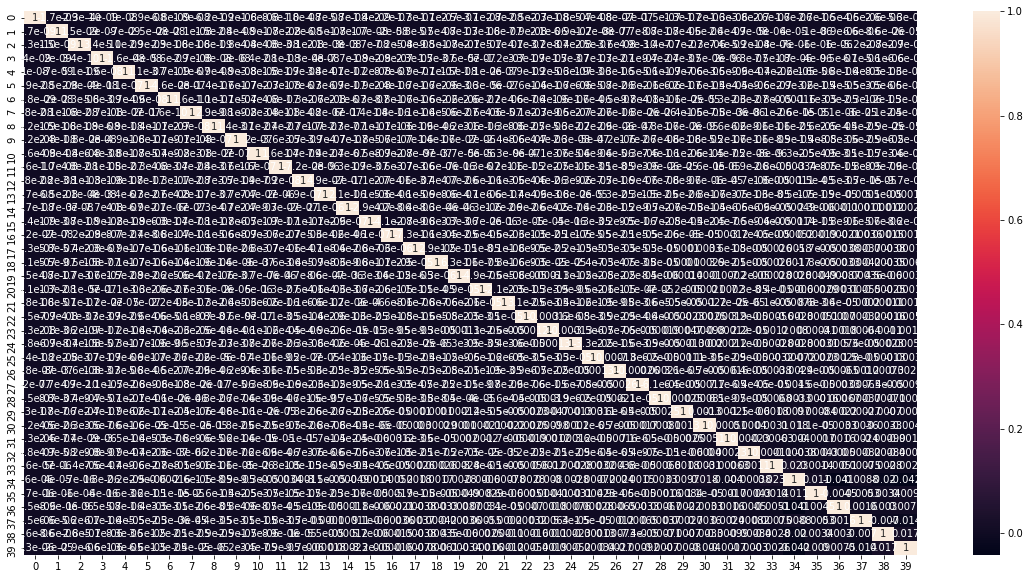

In [113]:
#creating a correlation matrix for the principal components.
corrmat = np.corrcoef(X_train_pca.transpose())

#plotting correlation matrix.
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [114]:
lr_pca = LogisticRegression()
model_pca = lr_pca.fit(X_train_pca,y_mju)

y_pred = lr_pca.predict(X_test_pca)

printMetrics(y_test,y_pred)

Confusion Matrix:
[[6588 1663]
 [ 125  625]]
('AUC Score: ', 0.8158910031107341)
('Precision: ', 0.2731643356643357)
('f1 Score: ', 0.41145490454246214)
('Sensitivity: ', 0.8333333333333334)
('Specificity: ', 0.7984486728881348)


### Logistic Regression - Adjusting Probability Threshold Cutoff - 

<span style='color:#14445B'>Let's select the optimum probability threshold for the model now. </span>

In [115]:
#Checking the predicted probabilities
y_pred_prob = lr_pca.predict_proba(X_test_pca)

#Creating predicted probability data frame
y_pred_prob_df = pd.DataFrame(y_pred_prob)
y_pred_prob_df = y_pred_prob_df.iloc[:,[1]]

y_test_df = pd.DataFrame(y_test)
y_test_df['ID'] = y_test_df.index

y_pred_prob_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

#Appending y_test_df and y_pred_prob_df
y_pred_final = pd.concat([y_test_df,y_pred_prob_df],axis=1)

In [116]:
#Renaming the column.
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
y_pred_final.head()

,churn,ID,Churn_Prob
0,1,20296,0.571476
1,1,8279,0.515463
2,0,72269,0.050752
3,0,65602,0.346311
4,1,42758,0.861335


In [117]:
#Now rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['ID','churn','Churn_Prob'], axis=1)
y_pred_final.head()

,ID,churn,Churn_Prob
0,20296,1,0.571476
1,8279,1,0.515463
2,72269,0,0.050752
3,65602,0,0.346311
4,42758,1,0.861335


In [118]:
#Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.Churn_Prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,ID,churn,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,20296,1,0.571476,1,1,1,1,1,1,0,0,0,0
1,8279,1,0.515463,1,1,1,1,1,1,0,0,0,0
2,72269,0,0.050752,1,0,0,0,0,0,0,0,0,0
3,65602,0,0.346311,1,1,1,1,0,0,0,0,0,0
4,42758,1,0.861335,1,1,1,1,1,1,1,1,1,0


In [119]:
#Calculate accuracy sensitivity & specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','speci','sensi','preci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    #print(cm1)
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    #print('accuracy',accuracy)
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    preci = cm1[1,1]/(cm1[0,1]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,speci,sensi,preci]
print(cutoff_df)

     prob  accuracy     speci     sensi     preci
0.0   0.0  0.083324  0.000000  1.000000  0.083324
0.1   0.1  0.391179  0.339595  0.958667  0.116569
0.2   0.2  0.531608  0.494849  0.936000  0.144148
0.3   0.3  0.640595  0.616410  0.906667  0.176853
0.4   0.4  0.724919  0.711187  0.876000  0.216118
0.5   0.5  0.801355  0.798449  0.833333  0.273164
0.6   0.6  0.862238  0.869592  0.781333  0.352587
0.7   0.7  0.900789  0.918313  0.708000  0.440664
0.8   0.8  0.918231  0.954793  0.516000  0.509211
0.9   0.9  0.922120  0.984972  0.230667  0.582492


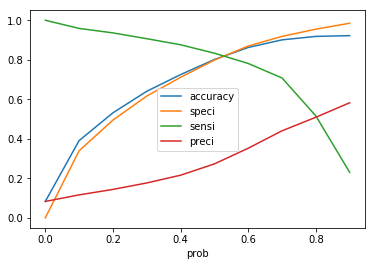

In [120]:
#Plot accuracy sensitivity & specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','speci','sensi','preci'])

In [121]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.51 else 0)

### Baseline Model -

In [122]:
#Checking overall accuracy  here.
printMetrics(y_pred_final.churn, y_pred_final.final_predicted)

Confusion Matrix:
[[6662 1589]
 [ 129  621]]
('AUC Score: ', 0.8177086413768028)
('Precision: ', 0.2809954751131222)
('f1 Score: ', 0.4195945945945946)
('Sensitivity: ', 0.828)
('Specificity: ', 0.8074172827536056)


### We just created our Baseline Model.

<span style='color:#14445B'>Below we will create multiple models where we would try to maximize the sensitivity & f1 score.</span>

### AdaBoost Model -
<span style='color:#14445B'>Now lets start with boosting models as they are known to perform better for imbalanced class problems. </span>

In [123]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [124]:
#Create a shallow tree
shallow_tree = DecisionTreeClassifier(max_depth=2, random_state = 100)

In [125]:
#Estimating optimum number of estimators.
estimators = list(range(40, 150, 10))

auc_scores = []

for n_est in estimators:
    ABC = AdaBoostClassifier(
    base_estimator=shallow_tree, 
    n_estimators = n_est)
    
    ABC.fit(X_mju, y_mju)
    y_pred = ABC.predict(X_test)
    score = roc_auc_score(y_test, y_pred)
    auc_scores.append(score)    

In [126]:
#Lets see the auc scores
auc_scores

[0.8266160869389568,
 0.8286160061406699,
 0.8288582394053245,
 0.8301917343352321,
 0.8311007958631278,
 0.8329188381206318,
 0.8278281420433886,
 0.8272220740920292,
 0.8235249868702783,
 0.8258884175655475,
 0.8298279804468146]

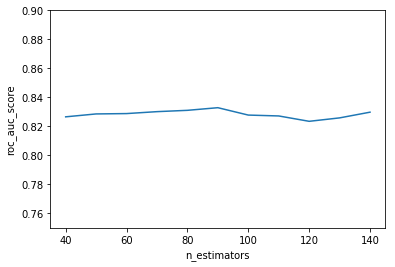

In [127]:
#ploting test scores and n_estimators
plt.plot(estimators, auc_scores)
plt.xlabel('n_estimators')
plt.ylabel('roc_auc_score')
plt.ylim([0.75, 0.9])
plt.show()

In [128]:
#Model for the best n estimators value.
ABC = AdaBoostClassifier(n_estimators=120,base_estimator=shallow_tree)

#fit the model.
ABC.fit(X_mju,y_mju)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
          learning_rate=1.0, n_estimators=120, random_state=None)

In [129]:
#Prediction on test set -
y_pred_abc =  ABC.predict(X_test)

printMetrics(y_test,y_pred_abc)

Confusion Matrix:
[[6912 1339]
 [ 144  606]]
('AUC Score: ', 0.8228583202036117)
('Precision: ', 0.3115681233933162)
('f1 Score: ', 0.4497217068645641)
('Sensitivity: ', 0.808)
('Specificity: ', 0.8377166404072234)


### Gradient Boosting Model -
<span style='color:#14445B'> Next we will try Gradient Boosting. </span>

In [130]:
from sklearn.ensemble import GradientBoostingClassifier

In [131]:
#Creating parameter grid for learning rate & subsample.
param_grid = {"learning_rate": [0.1,0.2, 0.6, 0.9],
              "subsample": [0.3, 0.6, 0.9]}

In [132]:
#Adaboost with the tree as base estimator -
GBC = GradientBoostingClassifier(max_depth=2, n_estimators=200)

In [133]:
#Running a grid search here -
folds = 3
grid_search_GBC = GridSearchCV(GBC, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = 'f1', 
                               return_train_score=True,                         
                               verbose = 1,n_jobs=3)

grid_search_GBC.fit(X_mju, y_mju)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  36 out of  36 | elapsed:   49.5s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=3,
       param_grid={'subsample': [0.3, 0.6, 0.9], 'learning_rate': [0.1, 0.2, 0.6, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=1)

In [134]:
#Check the best parameters obtained -
grid_search_GBC.best_params_

{'learning_rate': 0.1, 'subsample': 0.9}

In [135]:
#Running gradient boosting with optimum parameters.
GBC = GradientBoostingClassifier(learning_rate=0.1,subsample=0.3)

#fit & predict
GBC.fit(X_mju,y_mju)
y_pred_abc =  GBC.predict(X_test)
printMetrics(y_test,y_pred_abc)

Confusion Matrix:
[[7036 1215]
 [ 116  634]]
('AUC Score: ', 0.8490392275683756)
('Precision: ', 0.34288804759329367)
('f1 Score: ', 0.48787995382839555)
('Sensitivity: ', 0.8453333333333334)
('Specificity: ', 0.8527451218034178)


### Ensemble Model Creation -

<span style='color:#14445B'>Now we will create an ensemble model using decision trees, random forest, linear regression & Linear SVM model.The final prediction is done using majority vote. </span>

In [136]:
#loading libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve, GridSearchCV

<span style='color:#14445B'> Lets do a grid search to find optimum hyperparameters for creating decision trees. </span>

In [137]:
#Warning :  This run takes quite some time ~60 mins. Turn it Off if you don't want to wait. 
#RUN_GRID_SEARCH = True
RUN_GRID_SEARCH = False

grid_search_best_params_ = {'max_depth': 13,
                             'max_features': 25,
                             'min_samples_leaf': 95,
                             'min_samples_split': 20,
                             'random_state': 10}

def sensitivity_scorer(estimator, X_sensi_scorer, y_sensi_scorer):
     cp = confusion_matrix(y_sensi_scorer, estimator.predict(X_sensi_scorer))
     return cp[1,1]/(cp[1,0]+cp[1,1])

if RUN_GRID_SEARCH:
     parameter_grid = {'max_depth': list(range(1, 20, 1)),
                       'max_features': list(range(10, 20, 2)),
                       'min_samples_leaf': list(range(10, 100, 5)),
                       'min_samples_split': list(range(20, 50, 5)),
                       'max_features': list(range(10, 60, 5)),
                       'random_state': [43]}

     grid_search = GridSearchCV(
         DecisionTreeClassifier(),
         param_grid=parameter_grid,
         scoring=sensitivity_scorer)
     grid_search.fit(X_mju, y_mju)
     grid_search.best_score_, grid_search.best_params_
     grid_search_best_params_ = grid_search.best_params_

In [138]:
#Use the final hyperparmeters obtained from grid search above
print(grid_search_best_params_)

#{'max_features': 10, 'min_samples_split': 20, 'random_state': 43, 'max_depth': 1, 'min_samples_leaf': 10}
#{'max_depth': 13,'max_features': 25,'min_samples_leaf': 95,'min_samples_split': 20,'random_state': 10}

{'max_features': 25, 'min_samples_split': 20, 'random_state': 10, 'max_depth': 13, 'min_samples_leaf': 95}


In [139]:
#setting hyper parameters
grid_search_best_params_ = {'max_features': 10, 'min_samples_split': 20, 'random_state': 43, 'max_depth': 1, 'min_samples_leaf': 10}

# Build Decision tree using parameters obtained.
dtree=DecisionTreeClassifier(**grid_search_best_params_)
dtree.fit(X_mju, y_mju)
printMetrics(y_test, dtree.predict(X_test))

Confusion Matrix:
[[6570 1681]
 [ 220  530]]
('AUC Score: ', 0.7514668929018704)
('Precision: ', 0.2397105382180009)
('f1 Score: ', 0.35798716649780477)
('Sensitivity: ', 0.7066666666666667)
('Specificity: ', 0.7962671191370743)


In [140]:
#importing linear SVM
from sklearn.svm import LinearSVC

#Building linear SVM model
SVM = LinearSVC()
SVM.fit(X_train_pca, y_mju)
printMetrics(y_test, SVM.predict(X_test_pca))

Confusion Matrix:
[[6284 1967]
 [ 328  422]]
('AUC Score: ', 0.6621356603240011)
('Precision: ', 0.17664294683968187)
('f1 Score: ', 0.2688754380375916)
('Sensitivity: ', 0.5626666666666666)
('Specificity: ', 0.7616046539813356)


In [141]:
from sklearn.ensemble import RandomForestClassifier

# build random forest classifier
RF = RandomForestClassifier(**grid_search_best_params_)#n_estimators=20
RF.fit(X_mju, y_mju)
printMetrics(y_test, RF.predict(X_test))

Confusion Matrix:
[[6286 1965]
 [ 136  614]]
('AUC Score: ', 0.7902568577546156)
('Precision: ', 0.23807677394338891)
('f1 Score: ', 0.36887954340642837)
('Sensitivity: ', 0.8186666666666667)
('Specificity: ', 0.7618470488425645)


In [142]:
# build logistic regression model
LR = LogisticRegression()
LR.fit(X_mju, y_mju)
printMetrics(y_test, RF.predict(X_test))

Confusion Matrix:
[[6286 1965]
 [ 136  614]]
('AUC Score: ', 0.7902568577546156)
('Precision: ', 0.23807677394338891)
('f1 Score: ', 0.36887954340642837)
('Sensitivity: ', 0.8186666666666667)
('Specificity: ', 0.7618470488425645)


<span style='color:#14445B'>Now we can build ensemble mode below & take the majority vote!! </span>

In [143]:
ENSEMBLE_MODEL_pred = list(map(lambda x: 1 if (sum(x)>=2) else 0, zip(LR.predict(X_test),
                                                          dtree.predict(X_test),            
                                                          RF.predict(X_test),                                                          
                                                          SVM.predict(X_test_pca))))
printMetrics(y_test, ENSEMBLE_MODEL_pred)

Confusion Matrix:
[[6422 1829]
 [ 126  624]]
('AUC Score: ', 0.8051649497030662)
('Precision: ', 0.2543823889115369)
('f1 Score: ', 0.38963471745238837)
('Sensitivity: ', 0.832)
('Specificity: ', 0.7783298994061326)


### Prediction Models - Summary -

<span style='color:#14445B'>Here are the summary for the model scores obtained on test data -</span>

- <span style='color:#14445B'>The best prediction model was obtained using Gradiant Boost with a sensitivity of approx. 86% a precision of 35% & F1 score of 49% was obtained.</span>

### Understanding the Parameters For Customer Churn -

<span style='color:#14445B'>We try to understand the parameters for customer churn and if any corrective action that can be taken by operator.We will be using the following approach: </span>
- <span style='color:#14445B'>Create a logistic regression model without doing PCA on complete feature set.</span>
- <span style='color:#14445B'>Remove initial unimportant features by doing a LASSO penalty and also tune alpha for the process.</span>
- <span style='color:#14445B'>On reduced feature set model obtained above do further reduction in features using p-value and VIF.</span>
- <span style='color:#14445B'>Obtain the final model to do the analysis for customer churn. </span>

In [144]:
#importing stats model
import statsmodels.api as sm

# Putting feature variable to X
X = telecom_data.drop(['churn','mobile_number'],axis=1)

# Putting response variable to y
y = telecom_data['churn']

In [145]:
#Extract columns
cols = X.columns

#Apply standard scalar
scaler = StandardScaler()

#Produce scaled features
X_scaled = scaler.fit_transform(X)

#Convert to data frame
X_scaled = pd.DataFrame(X_scaled, columns=cols)

In [146]:
#Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, train_size=0.7,test_size=0.3,random_state=100)

#Create majority class undersampled data frame from training data
df_train_mju = MajorityClassUnderSampler(X_train,y_train)

#Extract features & labels
X_mju = df_train_mju.drop('churn',axis=1)
y_mju = df_train_mju.churn

X_mju.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,...,std_ic_t2m_mou_good_ph,std_ic_t2t_mou_good_ph,std_ic_t2f_mou_good_ph,loc_ic_t2m_mou_good_ph,loc_ic_t2t_mou_good_ph,loc_ic_t2f_mou_good_ph,offnet_mou_good_ph,onnet_mou_good_ph,og_others_good_ph,ic_others_good_ph
18,-0.172731,0.744082,-0.208145,-0.168644,-0.189707,-0.253055,-0.467038,-0.220818,1.869065,1.021836,...,-0.134625,-0.169589,-0.153405,-0.289824,-0.309798,-0.339520,0.020118,0.068143,0.062970,-0.082473
29,-0.492906,-0.320723,-0.599449,3.706077,1.110747,-0.343393,-0.649485,-0.301836,-0.207789,-0.373383,...,-0.319392,-0.181980,-0.153405,-0.659340,-0.379253,-0.350795,-0.773565,-0.524058,-0.099419,-0.082473
34,0.054896,-0.442811,0.700342,-0.161898,-0.140527,-0.317840,0.184472,-0.301836,0.212576,-0.309769,...,0.214580,-0.126286,-0.153405,-0.431780,-0.418833,-0.353049,0.815560,-0.522102,-0.142046,-0.082473
44,-0.176466,-0.506723,-0.623720,0.225695,0.133640,-0.343393,-0.646490,-0.301836,-0.236923,-0.373383,...,-0.319392,-0.201966,-0.153405,-0.729557,-0.420265,-0.353049,-0.576833,-0.593125,-0.142046,-0.082473
48,-1.013237,-0.510671,-0.695102,-0.168644,-0.189707,-0.343393,-0.649485,-0.301836,-0.236923,-0.373383,...,1.198282,0.035733,-0.126601,-0.560693,-0.359082,-0.264432,0.289628,1.361629,-0.142046,1.541328


In [147]:
y_mju.head()

18    1
29    1
34    1
44    1
48    1
Name: churn, dtype: int64

In [148]:
#Lasso Regression - feature Selection
#possible_alpha = [i/10 for i in range(1, 100)]
#alpha_sensitivity = []
#print(possible_alpha)

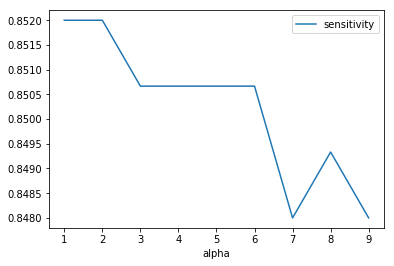

In [149]:
#Lasso Regression - feature Selection
possible_alpha=[ 1,2,3,4,5,6,7,8,9]
alpha_sensitivity = []

#Lasso Regression - feature Selection
for alpha in possible_alpha:
    lassolr = LogisticRegression(C=alpha, penalty='l1', solver='liblinear')
    #lassolr = LogisticRegression(C=1.0, penalty='l1', solver='liblinear')
    lassolr.fit(X_mju, y_mju)
    cp = confusion_matrix(y_test, lassolr.predict(X_test))
    alpha_sensitivity.append({"alpha": alpha, "sensitivity": cp[1,1]/(cp[1,0]+cp[1,1])})

pd.DataFrame(alpha_sensitivity).plot.line(x='alpha', y='sensitivity')

<span style='color:#14445B'>Here can see that sensitivity is maximized for alpha = 3. 
Let's run model with LASSO (l1) penalty and drop all features with zero coefficients.</span>

In [150]:
# run with alpha=0.4 and penalty = 'l1'
lassolr = LogisticRegression(C=4, penalty='l1', solver='liblinear')
lassolr.fit(X_mju, y_mju)
LR_coefs = dict(zip(X_mju.columns, lassolr.coef_[0]))
{k:v for k,v in LR_coefs.items() if v == 0}

{'arpu_good_ph': 0.0, 'std_ic_t2f_mou_good_ph': 0.0}

<span style='color:#14445B'>We will now create our model, let's create a function to train model and print the model metrics, VIF values with the additional facility to drop columns which are passed in 'cols_to_drop' parameter of the function.We will run the below function iteratively to reduce features and arrive at final model </span>

In [151]:
#Function to test model, print metrics, VIF score & can drop columns -
def test_model(x_train, x_test, y_train, y_test, cols_to_drop = None):
    cols_to_drop = cols_to_drop or []
    x_train = x_train.drop(cols_to_drop, axis=1)
    x_test = x_test.drop(cols_to_drop, axis=1)
    lr = LogisticRegression(C=4.0, penalty='l1', solver='liblinear')
    lr.fit(x_train, y_train)
    print("Scoring on TEST {}, TRAIN {}".format(lr.score(x_test,y_test), lr.score(x_train,y_train)))
    printMetrics(y_test,lr.predict(x_test))
    x_train = sm.add_constant(x_train)
    stat_model = sm.Logit(y_train, x_train).fit_regularized(method='l1')
    print(stat_model.summary())
    # calculate VIF
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    for i, var in enumerate(x_train.columns):
        ## Even if we are doing a logistic regression above
        ## Do a Linear Regression here as we are just trying 
        ## to fing the variance of the features, how multicollinear
        rsq = sm.OLS(x_train[var], x_train.drop([var], axis=1)).fit().rsquared
        vif = round( 1 / (1 - rsq + 0.00000000001), 2)
        vif_df.loc[i] = [var, vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [152]:
# run model on majority undersampled training data
test_model(X_mju, X_test, y_mju, y_test)

Scoring on TEST 0.812798577936, TRAIN 0.836782968658
Confusion Matrix:
[[6678 1573]
 [ 112  638]]
('AUC Score: ', 0.8300115541550519)
('Precision: ', 0.2885572139303483)
('f1 Score: ', 0.43093549476528203)
('Sensitivity: ', 0.8506666666666667)
('Specificity: ', 0.8093564416434371)
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.395102077327
            Iterations: 413
            Function evaluations: 413
            Gradient evaluations: 413
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 3382
Model:                          Logit   Df Residuals:                     3305
Method:                           MLE   Df Model:                           76
Date:                Sun, 06 Oct 2019   Pseudo R-squ.:                  0.4300
Time:                        21:12:05   Log-Likelihood:                -1336.2
converged:                       T

,Var,Vif
73,offnet_mou_good_ph,7809.99
74,onnet_mou_good_ph,7755.86
58,std_og_t2t_mou_good_ph,6687.75
57,std_og_t2m_mou_good_ph,6224.30
2,onnet_mou_8,5477.67
3,offnet_mou_8,4964.03
10,std_og_t2t_mou_8,4113.26
11,std_og_t2m_mou_8,3228.09
60,loc_og_t2m_mou_good_ph,1392.91
61,loc_og_t2t_mou_good_ph,1065.69


### Dropping Variables with High P-Value & High VIF -
<span style='color:#14445B'> We run the test_model function iteratively to arrive at the below list of features with high p-value & high VIF to be dropped. </span>

In [153]:
cols_to_drop=["onnet_mou_8", "std_og_t2m_mou_8", "onnet_mou_good_ph",
       "offnet_mou_good_ph", "roam_ic_mou_good_ph", "loc_og_t2m_mou_good_ph",
      "og_others_8", "total_rech_amt_good_ph", "total_rech_amt_8", "isd_ic_mou_good_ph",
      "arpu_8", "vol_3g_mb_8", "loc_og_t2f_mou_good_ph", "isd_og_mou_8",
      "loc_ic_t2f_mou_good_ph", "spl_og_mou_good_ph", "std_ic_t2m_mou_good_ph",
      "std_og_t2f_mou_good_ph", "total_rech_amt_data_good_ph", "max_rech_data_good_ph",
      "std_ic_t2f_mou_good_ph", "loc_og_t2f_mou_8", "vbc_3g_good_ph", "isd_og_mou_good_ph",
      "total_rech_amt_data_8", "max_rech_amt_good_ph", "total_rech_num_good_ph",
      "sachet_2g_good_ph", "ic_others_8", "std_ic_t2f_mou_8", "og_others_good_ph",
      "ic_others_good_ph", "roam_ic_mou_8", "monthly_3g_good_ph", "loc_ic_t2m_mou_8",
      "loc_ic_t2m_mou_good_ph", "isd_ic_mou_8", "loc_og_t2c_mou_good_ph", "last_day_rch_amt_good_ph",
      "std_og_t2f_mou_8", "sachet_3g_good_ph", "sachet_3g_8", "std_og_t2t_mou_good_ph",
      "spl_ic_mou_good_ph", "loc_og_t2c_mou_8", "spl_og_mou_8", "vbc_3g_8",
      "vol_3g_mb_good_ph", "roam_og_mou_good_ph", "monthly_2g_8", "monthly_3g_8",
      "loc_og_t2t_mou_good_ph", "loc_og_t2t_mou_8", "max_rech_amt_8", "spl_ic_mou_8",
      "std_ic_t2t_mou_good_ph", "std_ic_t2m_mou_8", "std_ic_t2t_mou_8","std_og_t2m_mou_good_ph"]


LR_FEATURES = list(set(X_mju.columns) - set(cols_to_drop))

In [154]:
# run with columns to be dropped to check the final p-values and VIF
test_model(X_mju, X_test, y_mju, y_test, cols_to_drop=cols_to_drop)

Scoring on TEST 0.796244861682, TRAIN 0.818450620934
Confusion Matrix:
[[6544 1707]
 [ 127  623]]
('AUC Score: ', 0.8118913263038825)
('Precision: ', 0.267381974248927)
('f1 Score: ', 0.40454545454545454)
('Sensitivity: ', 0.8306666666666667)
('Specificity: ', 0.793115985941098)
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.430252259713
            Iterations: 78
            Function evaluations: 78
            Gradient evaluations: 78
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 3382
Model:                          Logit   Df Residuals:                     3364
Method:                           MLE   Df Model:                           17
Date:                Sun, 06 Oct 2019   Pseudo R-squ.:                  0.3793
Time:                        21:12:17   Log-Likelihood:                -1455.1
converged:                       True  

,Var,Vif
5,loc_ic_t2t_mou_8,1.90
17,loc_ic_t2t_mou_good_ph,1.78
1,offnet_mou_8,1.72
10,vol_2g_mb_8,1.67
7,total_rech_num_8,1.65
13,vol_2g_mb_good_ph,1.60
3,loc_og_t2m_mou_8,1.56
11,sachet_2g_8,1.46
8,last_day_rch_amt_8,1.40
16,arpu_good_ph,1.37


<span style='color:#14445B'> We can see the impact of some of the variables in visualizations below. </span>

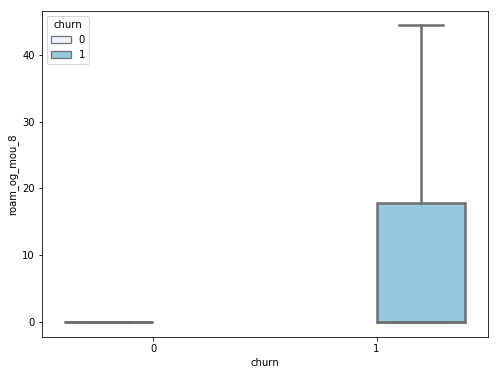

In [155]:
#Variables with positive coef
#Higher the value ==> more likely to churn

plt.rcParams["figure.figsize"] = [8, 6]
fig = plt.figure()
# High variance in Roam Outgoing Minutes of Usage, => probability of churn is high 
# if roaming minutes of usage increases. Same is apparent from the positive coef of the LR model
sns.boxplot(data=telecom_data, y="roam_og_mou_8", x="churn", hue="churn", linewidth=2.5, showfliers=False,color="skyblue")

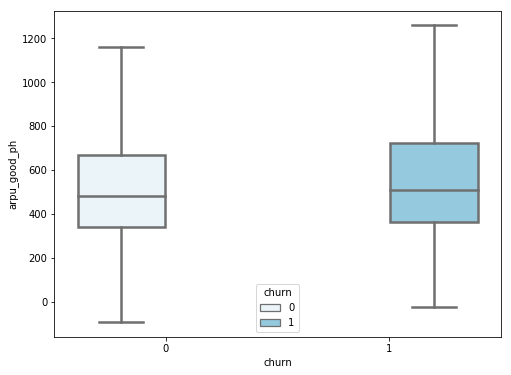

In [156]:
#High variance in ARPU of 8th month, => Customers are using some costly feature => high probability of churn
plt.rcParams["figure.figsize"] = [8, 6]
fig = plt.figure()
sns.boxplot(data=telecom_data, y="arpu_good_ph", x="churn", hue="churn", linewidth=2.5, showfliers=False,color="skyblue")

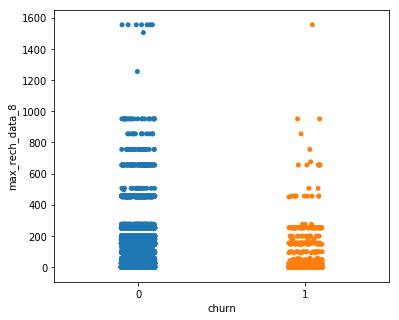

In [157]:
plt.rcParams["figure.figsize"] = [6, 5]
sns.stripplot(x="churn", y="max_rech_data_8", data=telecom_data, jitter=True)

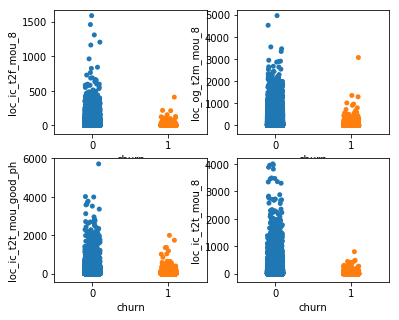

In [158]:
f,axes = plt.subplots(nrows=2, ncols=2)
sns.stripplot(x="churn", y="loc_ic_t2f_mou_8", data=telecom_data, jitter=True, ax=axes[0][0])
sns.stripplot(x="churn", y="loc_og_t2m_mou_8", data=telecom_data, jitter=True, ax=axes[0][1])
sns.stripplot(x="churn", y="loc_ic_t2t_mou_good_ph", data=telecom_data, jitter=True, ax=axes[1][0])
sns.stripplot(x="churn", y="loc_ic_t2t_mou_8", data=telecom_data, jitter=True, ax=axes[1][1])

<span style='color:#14445B'>Here the model Indicates that the good phase & the action phase parameters have comparative impact on customers churning. There is a higher chance of churn if any good phase indicator is high in range and if there is a drop in any action phase parameter value.</span><span style='color:#14445B'> Good phase indicators which reduce the possibility of churn are:</span>

- <span style='color:#14445B'>arpu_good_phase: average revenue per user: if the average revenue for customer is high in good phase then there is a less chance of churning.</span>

- <span style='color:#14445B'>loc_ic_t2t_mou_good_phase: incoming local calls within operator network: if minutes of usage for such calls is high in good phase then the customer is unlikely to churn.</span>

- <span style='color:#14445B'><span style='color:#14445B'>vol_2g_mb_good_phasease: volume of 2G data usage: if volumne of 2G data usage is high in good phase then there is less probability of churn.</span>

- <span style='color:#14445B'>aon: age on network: as age on network increases for a customer there is a decrease in chances of churn. </span>

<span style='color:#14445B'>Action phase indicators indicating customer churn are as follows:</span>

- <span style='color:#14445B'><span style='color:#14445B'>loc_ic_t2t_mou_8: local incoming calls within same telecom network: if the local incoming calls for t2t drop in action phase then there are high chances of churning.</span>

- <span style='color:#14445B'>loc_og_t2m_mou_8: local outgoing calls from telecom operator to other network mobile: again indicates a high possibility of customer churn.</span>

- <span style='color:#14445B'>vol_2g_mb_8/sachet_2g_8: volumne of 2G usage and sachet(small) topup for 2G data: a drop in 2G usage volume of sachet top-ups is also high indication of churn.</span></span>

- <span style='color:#14445B'>max_rech_data_8: maximum data recharge: as above if the maximum data recharge done by customer drops in action phase then it also indicates a tendency to churn.</span>

- <span style='color:#14445B'>loc_ic_t2f_mou_8: local incoming calls from fixed line: a drop in calls from fixed line to customer is also highly suggestive of churn.</span>

- <span style='color:#14445B'>day_of_last_rech_shift: shift in day of last recharge as compared to previous month: if the last recharge is not in the last week of month then this behaviour is also highly indicative of churn.</span>

- <span style='color:#14445B'>roam_og_mou_8:  roaming outgoing calls: if there is an increase in outgoing roaming calls then the customer is likely to churn as he/she might be incurring high roaming charges and hence would want to switch to a local number.</span>

<span style='color:#14445B'>Apart from the above model based features we have also noticed in EDA that the % of churn is higher for 2G usage as compared to 3G usage suggesting that some users may be migrating to other operators due to availability of better 3G network. Also, in some cases there is a small increase in calls to call centre in 7th month followed by drop in 8th month, which indicates that customers might be calling for some issues based on which they might have decided to switch to a better service provider.</span>

In [159]:
# vol 2g/3g usage
ls_3g_2g = telecom_data.columns[telecom_data.columns.str.contains('vol_2g_mb|vol_3g_mb',regex=True)]

# let's check the mean variation in total recharge numbers for churned and non churned customers
pd.DataFrame([telecom_data.loc[telecom_data.churn==0,ls_3g_2g].mean()
              ,telecom_data.loc[telecom_data.churn==1,ls_3g_2g].mean()],index={'Non Churned','Churned'})

,vol_2g_mb_8,vol_3g_mb_8,vol_2g_mb_good_ph,vol_3g_mb_good_ph
Non Churned,113.243187,374.884935,128.029971,366.686811
Churned,23.152745,87.399685,100.742509,250.429226


## Based on the above analysis our recommendations to reduce the customer churn are as follows  -

- <span style='color:#14445B'>Improved Network coverage for 2G in places where 3G is not avilable.</span>
- <span style='color:#14445B'>Expansion of the 3G network</span>
- <span style='color:#14445B'>Reduced roaming charges as it is one of the major reasons for pre-paid customers to look for local operators while on roaming.</span>
- <span style='color:#14445B'>Customized pre-paid plan offers: Continuous monitoring of behavioural signs listed above in action phase to offer customized per-paid plans to customers, eg : Plans like extra talktime minutes for local and same operator calls</span>
- <span style='color:#14445B'>Privilege Customer offers: for customer who have been a part of the family since long like extra benefits which will further more strengthen the bond</span>